# **Group 5 Purple Bit Logic Final Project**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# *Introduction: NBFI Vehicle Loan repayment Dataset*

A Non-Banking Financial Institution (NBFI) or Non-Bank Financial Company (NBFC) is a financial institution that operates similarly to banks but is not authorized to do so, nor is it supervised by a banking regulatory agency at the national or international level. Services provided by NBFCs include investment, risk pooling, contractual savings, and market brokering. 

Currently, an NBFC is experiencing a decline in profitability due to a rise in defaults within the vehicle loan category. In response, the company aims to evaluate the repayment ability of clients and identify the key factors contributing to a borrower's ability to repay the loan.

The objective is to construct a model to predict the likelihood of a client defaulting on their vehicle loan payment. However, before creating a model, the company plans to utilize data visualization techniques to determine which features have the most predictability, thereby minimizing noise during the model-building process.

https://www.kaggle.com/datasets/meastanmay/nbfi-vehicle-loan-repayment-dataset?select=Train_Dataset.csv

# *Objective: Finding the pattern difference by Data Visualization*

Based on the dataset, our objective for this project is to visualize pattern difference between the defaulted customers and non default customers on some of the variables to verify what variables can be kept and what can be removed for the further model-building process.

In [2]:
loan = pd.read_csv("E:\\Object-Oriented-Python\\project\\loan_default_data.csv")
loan
print(loan.columns)
loan.info()

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column     

# *Data Cleaning*

## duplicate rows and columns

To check the whether duplicated rows and columns exist, we used .duplicated() method to verify\
\
As we can see below that there are no duplicated rows and columns in this dataframe

In [3]:
loan.duplicated().value_counts()

False    121856
dtype: int64

In [4]:
loan.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

## Select the features

We first tried to used the correlation coefficient to select the features, but the correlation for each features are not significant, the reason for this is because of the unbalanced proportion of defaulted and non default observations.

In [5]:
loan.corr()['Default']

ID                            0.000432
Client_Income                -0.021516
Car_Owned                    -0.023221
Bike_Owned                    0.000431
Active_Loan                   0.000240
House_Own                    -0.001011
Child_Count                   0.019687
Credit_Amount                -0.031049
Loan_Annuity                 -0.012109
Population_Region_Relative   -0.002395
Age_Days                     -0.074074
Employed_Days                -0.075510
Registration_Days            -0.038524
ID_Days                      -0.054089
Own_House_Age                 0.047513
Mobile_Tag                    0.000849
Homephone_Tag                 0.021593
Workphone_Working            -0.025682
Client_Family_Members         0.011110
Cleint_City_Rating            0.058857
Application_Process_Day       0.005693
Application_Process_Hour     -0.023589
Score_Source_1               -0.146809
Score_Source_2               -0.155393
Score_Source_3               -0.175513
Social_Circle_Default    

In [6]:
loan['Default'].value_counts(1)

0    0.919208
1    0.080792
Name: Default, dtype: float64

Thus we decided to select the features by our own judgment that we think may have strong correlation with default.\
The selected columns are as below.


In [7]:
col = ['Client_Income','Credit_Amount','Loan_Annuity','Client_Income_Type','Client_Education','Age_Days','Application_Process_Day','Application_Process_Hour',
       'Score_Source_1','Score_Source_2','Score_Source_3',
       'Car_Owned', 'Employed_Days', 'Registration_Days',
       'Default']
loan = loan.loc[0:,col]
loan.head()

,Client_Income,Credit_Amount,Loan_Annuity,Client_Income_Type,Client_Education,Age_Days,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Car_Owned,Employed_Days,Registration_Days,Default
0,6750.0,61190.55,3416.85,Commercial,Secondary,13957.0,6.0,17.0,0.568066,0.478787,NaN,0.0,1062.0,6123.0,0
1,20250.0,15282.00,1826.55,Service,Graduation,14162.0,3.0,10.0,0.563360,0.215068,NaN,1.0,4129.0,7833.0,0
2,18000.0,59527.35,2788.20,Service,Graduation dropout,16790.0,4.0,NaN,NaN,0.552795,0.329655,0.0,5102.0,NaN,0
3,15750.0,53870.40,2295.45,Retired,Secondary,23195.0,2.0,15.0,NaN,0.135182,0.631355,0.0,NaN,NaN,0
4,33750.0,133988.40,3547.35,Commercial,Secondary,11366.0,3.0,NaN,0.508199,0.301182,0.355639,1.0,2977.0,5516.0,0


## Missing Data : Clinet Income

To deal with the misiing data of Client Income, we used mean of Client Income to fill in

import warnings

# suppress the warning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="A value is trying to be set on a copy of a slice from a DataFrame")

In [8]:
loan['Client_Income'] = loan['Client_Income'].fillna(loan['Client_Income'].mean())
print('Remaining missing data for Income:',loan['Client_Income'].isnull().sum())

Remaining missing data for Income: 0


## Missing Data: Credit Amount and Loan Annuity

For the missing data of Credit Amount and Loan Annuity, since these two columns are highly related, it is inappropriate to fill the mean into these two columns seperately.\

So we decided to calulate the Loan Duration (Credit Amount / Loan Annuity) and fill the missing data of Loan Duration by mean.

In [9]:
loan['Loan_Duration'] = loan['Credit_Amount']/loan['Loan_Annuity']
print('Missing data for Loan_Duration:',loan['Loan_Duration'].isnull().sum())
loan['Loan_Duration'] = loan['Loan_Duration'].fillna(loan['Loan_Duration'].mean())
print('Remaining missing data for Loan_Duration:',loan['Loan_Duration'].isnull().sum())

Missing data for Loan_Duration: 8318
Remaining missing data for Loan_Duration: 0


Then we calculated and fill the misiing Credit Amount according to the Loan Annuity and Loan Duration.\
You can see that their is still 145 observations missing the Credit Amount data, that refers these observations are missing both Credit Amount and Loan Annuity.\
Thus we used mean to fill the missing Credit Amount, then calculated and fill the misiing Loan Annuity according to the Credit Amount and Loan Duration.

In [10]:
loan['Credit_Amount'] = loan['Credit_Amount'].fillna(np.round(loan['Loan_Annuity']*loan['Loan_Duration'],2))
print('Remaining missing data for Credit Amount:',loan['Credit_Amount'].isnull().sum())

loan['Credit_Amount']= loan['Credit_Amount'].fillna(loan['Credit_Amount'].mean())
print('Remaining missing data for Credit Amount:',loan['Credit_Amount'].isnull().sum())

loan['Loan_Annuity'] = loan['Loan_Annuity'].fillna(np.round(loan['Credit_Amount']/loan['Loan_Duration'],2))
print('Remaining missing data for Loan Annuity:',loan['Loan_Annuity'].isnull().sum())

Remaining missing data for Credit Amount: 145
Remaining missing data for Credit Amount: 0
Remaining missing data for Loan Annuity: 0


## Missing Data: Client Income Type

Client Income Type is a categorical data, and we first look into the distribution of each category, you can see that the distribution of each category is very unbalanced\
so we decided to fill in the missing data by mode, the most category.

In [11]:
print('The proportion of Client Income Type: \n',loan['Client_Income_Type'].value_counts(1))
loan['Client_Income_Type'] = loan['Client_Income_Type'].fillna(loan['Client_Income_Type'].value_counts().idxmax())
print('Remaining missing data for Client Income Type:',loan['Client_Income_Type'].isnull().sum())

The proportion of Client Income Type: 
 Service            0.516508
Commercial         0.234979
Retired            0.178097
Govt Job           0.070272
Student            0.000068
Unemployed         0.000051
Maternity leave    0.000017
Businessman        0.000008
Name: Client_Income_Type, dtype: float64
Remaining missing data for Client Income Type: 0


## Missing Data: Client Education

Client Education is a categorical data, same as Client Income Type, the distribution of each category is very unbalanced\
so we decided to fill in the missing data by mode, the most category.

In [12]:
print('The proportion of Client Education \n',loan['Client_Education'].value_counts(1))
loan['Client_Education'] = loan['Client_Education'].fillna(loan['Client_Education'].value_counts().idxmax())
print('Remaining missing data for Client Education:',loan['Client_Education'].isnull().sum())

The proportion of Client Education 
 Secondary             0.709841
Graduation            0.243793
Graduation dropout    0.033499
Junior secondary      0.012308
Post Grad             0.000558
Name: Client_Education, dtype: float64
Remaining missing data for Client Education: 0


## Missing Data: Age_Days

In this data set, age data is recorded in days measure, which is different from the common way and is not intuitive,\
so we fill in the missing Age_Days by mean then we transform the days to years for the visualization.


In [13]:
print('Number of missing entries for Age_Days:',loan['Age_Days'].isnull().sum())

Number of missing entries for Age_Days: 3617


In [14]:
loan['Age_Days'] = loan['Age_Days'].fillna(loan['Age_Days'].mean())
loan['Age'] = loan["Age_Days"]//365
loan['Age']
print('Remaining missing data for Age_Days:',loan['Age_Days'].isnull().sum())
print('Remaining missing data for Age:',loan['Age'].isnull().sum())

Remaining missing data for Age_Days: 0
Remaining missing data for Age: 0


## Missing Data: Employed_Days

We fill in the missing values for employed days using mean using same stratey as Age_Days\
We also transform Employed_Days years for better visualization as employed days will have too many possible values

In [15]:
loan['Employed_Days'] = loan['Employed_Days'].fillna(loan['Employed_Days'].mean())
loan['Employed_Years'] = loan["Employed_Days"]//365
loan['Employed_Years']
print('Remaining missing data for Employed_Days:',loan['Employed_Days'].isnull().sum())
print('Remaining missing data for Employed_Years:',loan['Employed_Years'].isnull().sum())

Remaining missing data for Employed_Days: 0
Remaining missing data for Employed_Years: 0


## Missing Data: Registration_Days

We fill in the missing values for registragion days using mean as well\
We also transform Registration_Days to years for better visualization as registration days will have too many possible values

In [16]:
print('Initial Number of missing entries for Registration_Days:',loan['Registration_Days'].isnull().sum())
loan['Registration_Days'] = loan['Registration_Days'].fillna(loan['Registration_Days'].mean())
loan['Registration_Years'] = loan["Registration_Days"]//365
loan['Registration_Years']
print('Remaining missing data for Registration_Days:',loan['Registration_Days'].isnull().sum())
print('Remaining missing data for Registration_Years:',loan['Registration_Years'].isnull().sum())

Initial Number of missing entries for Registration_Days: 3631
Remaining missing data for Registration_Days: 0
Remaining missing data for Registration_Years: 0


## Another Strategy to deal with the categorical missing data

For some categorical data, their distribution are really balance, so we set the following function that would help us fill in the missing categorical data\
by the proportion of existing data in a random way.\
For example, there are A,B & C, 3 kinds of data in a categorical column, and A accounts for 50% of existing data, B and C accounts for 25% for each. So we randomly pick\
50% of missing data to fill in A, 25% of missing data for B and 25% of missing data for C.\
In this way we won't destroy the original balanced distribution when filling in missing data

In [17]:
def fill_na(df, col):
    # calculate the frequency of every unique element
    freq = df[col].value_counts(normalize=True)
    # calculate the total amount of null
    na_count = df[col].isna().sum()
    # generate an array of unique elements according to the frequency of every unique element
    fill_values = np.random.choice(freq.index, size=na_count, p=freq.values)
    # replace the null by the array
    df.loc[df[col].isna(), col] = fill_values

## Missing Data: Application Process Day & Hour

For the Application Process Day & Hour these two column, is in quiet same situation as Active Loan, so we apply same function to fill in the missing data.\
As we can the proportion of each category before and after filling in missing data is basically unchanged.

In [18]:
print('Numbers of missing data:',loan['Application_Process_Day'].isnull().sum())
print('The Proportion Before filling missing data:')
loan['Application_Process_Day'].value_counts(normalize=True)

Numbers of missing data: 2428
The Proportion Before filling missing data:


2.0    0.175059
3.0    0.168436
1.0    0.165053
4.0    0.164685
5.0    0.164224
6.0    0.109899
0.0    0.052643
Name: Application_Process_Day, dtype: float64

In [19]:
fill_na(loan,'Application_Process_Day')
print('Remaining missing data:',loan['Application_Process_Day'].isnull().sum())
print('The Proportion After filling missing data:')
loan['Application_Process_Day'].value_counts(normalize=True)

Remaining missing data: 0
The Proportion After filling missing data:


2.0    0.174846
3.0    0.168502
1.0    0.165162
4.0    0.164530
5.0    0.164325
6.0    0.109941
0.0    0.052693
Name: Application_Process_Day, dtype: float64

In [20]:
print('Numbers of missing data:',loan['Application_Process_Hour'].isnull().sum())
print('The Proportion Before filling missing data:')
loan['Application_Process_Hour'].value_counts(normalize=True)

Numbers of missing data: 3663
The Proportion Before filling missing data:


10.0    0.122385
11.0    0.121945
12.0    0.109795
13.0    0.099541
14.0    0.090547
9.0     0.089049
15.0    0.081342
16.0    0.065478
17.0    0.049436
8.0     0.049250
18.0    0.029401
7.0     0.029113
6.0     0.019011
19.0    0.012387
5.0     0.012158
4.0     0.007225
3.0     0.004281
20.0    0.004180
21.0    0.001388
2.0     0.000948
22.0    0.000567
1.0     0.000237
0.0     0.000220
23.0    0.000118
Name: Application_Process_Hour, dtype: float64

In [21]:
fill_na(loan,'Application_Process_Hour')
print('Remaining missing data:',loan['Application_Process_Hour'].isnull().sum())
print('The Proportion After filling missing data:')
loan['Application_Process_Hour'].value_counts(normalize=True)

Remaining missing data: 0
The Proportion After filling missing data:


10.0    0.122366
11.0    0.122029
12.0    0.109638
13.0    0.099601
14.0    0.090763
9.0     0.088793
15.0    0.081235
16.0    0.065569
17.0    0.049321
8.0     0.049263
18.0    0.029617
7.0     0.029010
6.0     0.019047
19.0    0.012457
5.0     0.012129
4.0     0.007271
3.0     0.004259
20.0    0.004136
21.0    0.001387
2.0     0.000968
22.0    0.000574
1.0     0.000238
0.0     0.000213
23.0    0.000115
Name: Application_Process_Hour, dtype: float64

## Missing Data: Car Owned
Car Owned is also a categorical variable with possible values of 0 and 1.\
We use similar strategy as Application_Process_Hour to fill in the missing values and fill in the data randomly based on the distribution of categorical values so that we retain the same distribution

In [22]:
print('Number of missing entries for Car_Owned:',loan['Car_Owned'].isnull().sum())
car_owned_distribution = loan['Car_Owned'].value_counts() / loan['Car_Owned'].value_counts().sum() * 100
print('Percentage of entries for cases Car_Owned =0 and 1 before filling missing values:\n',car_owned_distribution)

Number of missing entries for Car_Owned: 3581
Percentage of entries for cases Car_Owned =0 and 1 before filling missing values:
 0.0    65.714648
1.0    34.285352
Name: Car_Owned, dtype: float64


In [23]:
fill_na(loan,'Car_Owned')

In [24]:
print('Remaining number of missing entries for Car_Owned:',loan['Car_Owned'].isnull().sum())
car_owned_distribution = loan['Car_Owned'].value_counts() / loan['Car_Owned'].value_counts().sum() * 100
print('Percentage of entries for cases Car_Owned =0 and 1 after filling missing values:\n',car_owned_distribution)

Remaining number of missing entries for Car_Owned: 0
Percentage of entries for cases Car_Owned =0 and 1 after filling missing values:
 0.0    65.704602
1.0    34.295398
Name: Car_Owned, dtype: float64


## Missing Data: Credit Score

The credit scores in this dataset are gathered from 3 sources, and the scores are normalized between 0 to 1.\
Instead of filling missing data for each source seperately or choosing 1 specific source, we choose to calulate the average score of 3 sources,\
then filling in missing data for average score by mean. We consider this would keep more information from original data.

In [25]:
loan['Avg_Score'] = loan[['Score_Source_1','Score_Source_2','Score_Source_3']].mean(axis=1)
print('Numbers of missing data:',loan['Avg_Score'].isnull().sum())
loan['Avg_Score'] = loan['Avg_Score'].fillna(loan['Avg_Score'].mean())
print('Remaining missing data:',loan['Avg_Score'].isnull().sum())

Numbers of missing data: 694
Remaining missing data: 0


# *Analysis and Visualization*

## Client_Income Analysis - Histogram

We first plot the histogram to see if there is any difference on the distribution of Clinet Income between the defaulted and non default client

<Figure size 2400x1200 with 0 Axes>

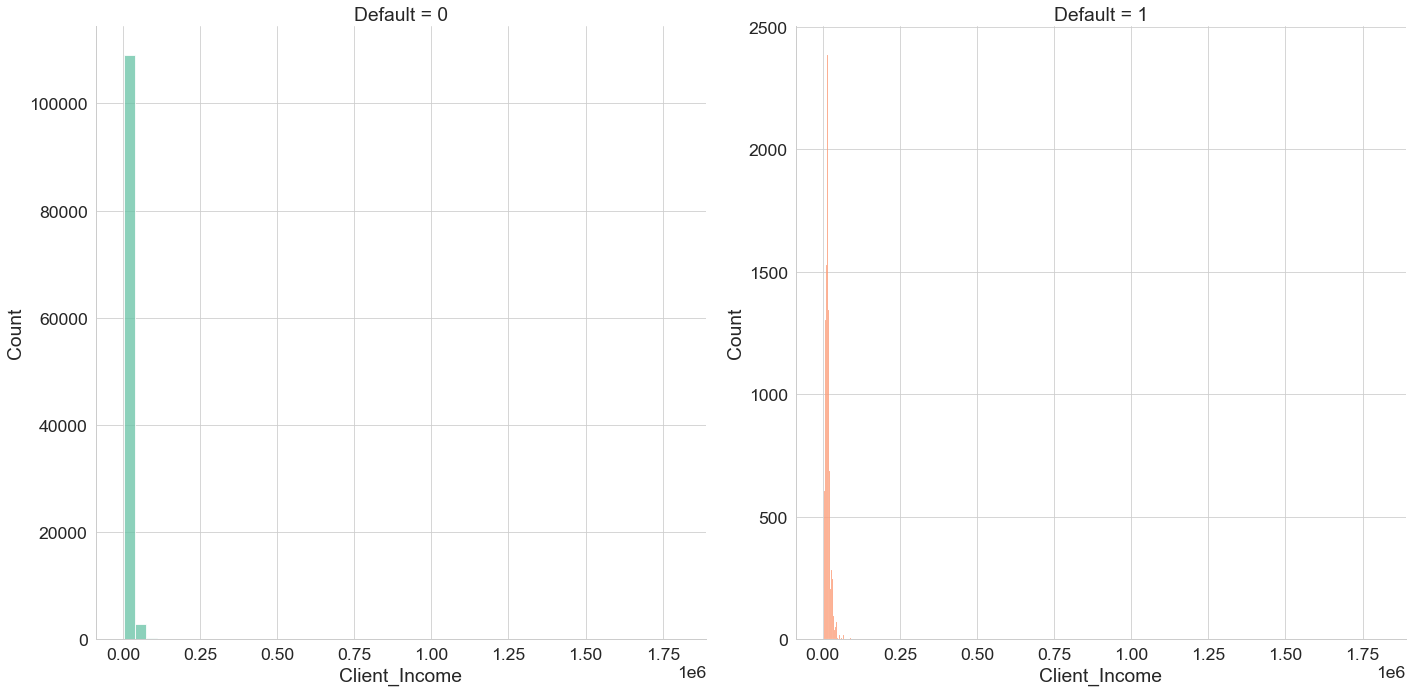

In [26]:
plt.figure(figsize=(12,6),dpi=200)
sns.set(style="whitegrid")
sns.set_context("paper",font_scale=2)
a = sns.FacetGrid(data= loan, col = 'Default',height=10,aspect=1, sharey=False,hue='Default',palette="Set2")
a.map_dataframe(sns.histplot, x= 'Client_Income',bins=50)

As we can see the distribution is extreamly left-skewed, but the scale of x-axis even reach to 1.75 million, that means there are some observations have extremely high income,\
which is outlier. Thus, according to graph above, we adapt 250k as a cut-off value to exclude the outliers from the dataset.

In [27]:
outlier =loan[loan['Client_Income']>250000].index
no_outlier = loan.drop(outlier,axis=0)
no_outlier['Client_Income'].max()

225000.0

Then we plot again

<Figure size 2400x1200 with 0 Axes>

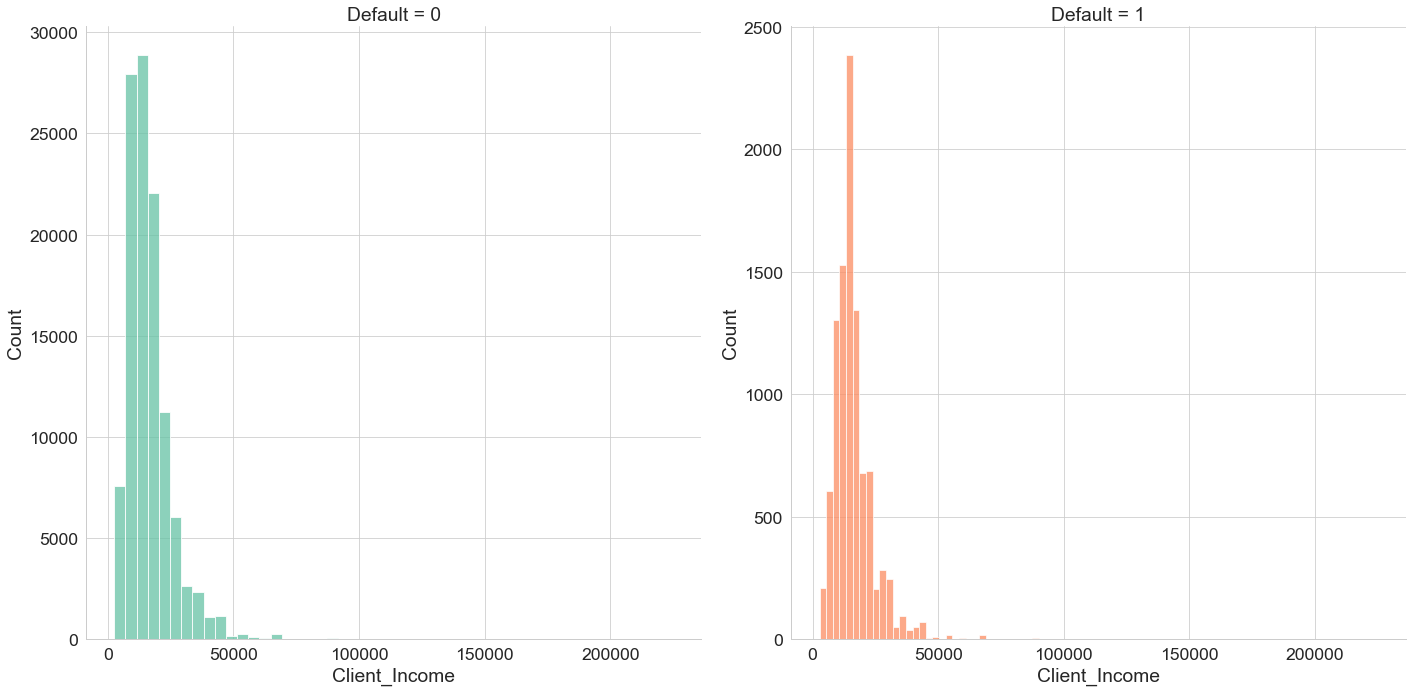

In [28]:
plt.figure(figsize=(12,6),dpi=200)
a = sns.FacetGrid(data= no_outlier, col = 'Default',height=10,aspect=1, sharey=False,hue='Default',palette="Set2")
a.map_dataframe(sns.histplot, x= 'Client_Income',bins=50)

The plot is better than the first one, but is still extreamly left-skewed, but we concern that if we keep lowering down the cut-off value and excluding more outlier,\
we may destroy more information from the original data. Since we only want to have more detailed look into the distribution with left skewed part (the low income),\
for this time we set limitation of scale of x-axis at 50k.

<Figure size 2400x1200 with 0 Axes>

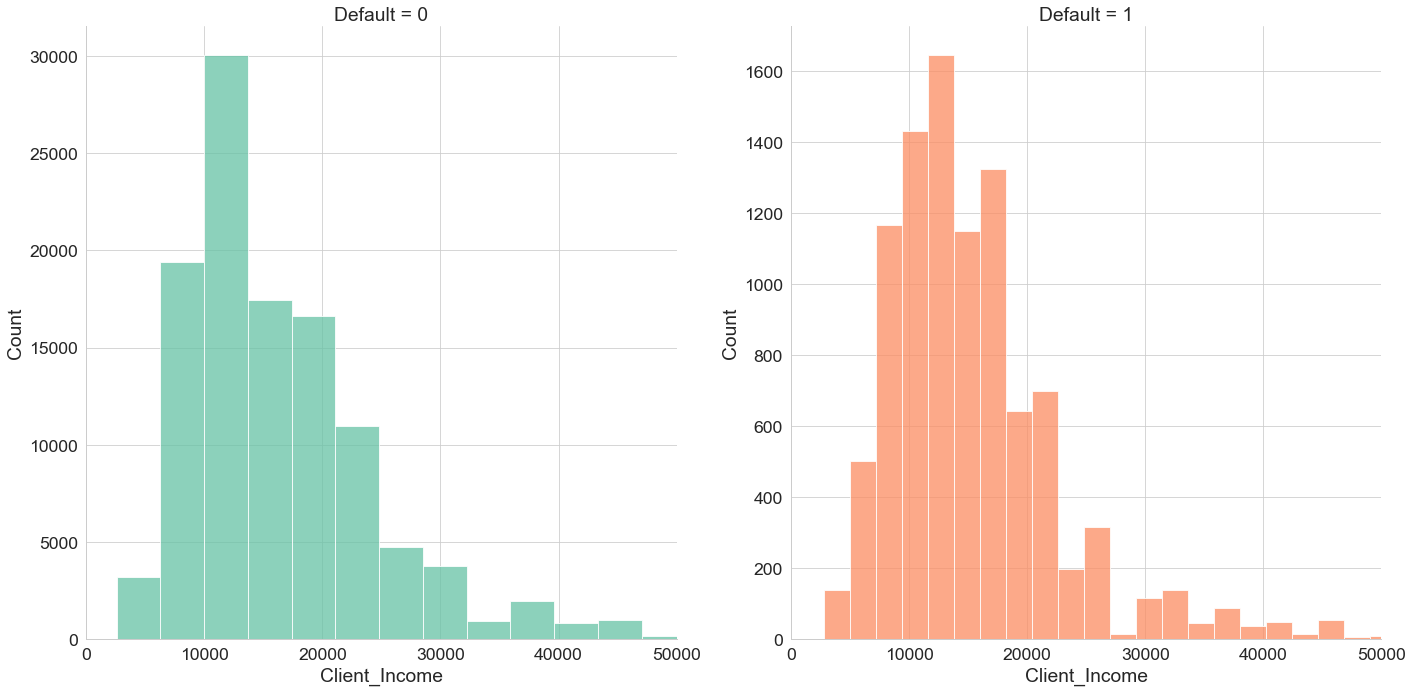

In [29]:
plt.figure(figsize=(12,6),dpi=200)
a = sns.FacetGrid(data= no_outlier, col = 'Default',height=10,aspect=1, xlim=(0,50000), sharey=False,hue='Default',palette="Set2")
a.map_dataframe(sns.histplot, x= 'Client_Income',bins=60)


From above histograms, we have some findings:
1. The total numbers of two groups: Defaulted and Non Default clients, have large difference.
2. Even we focus on the certain scale of income, we still can see the left-skewed of the distribution, this could be explained by the background of this dataset, since the dataset is from the NBFI, we can assume that most customers of NBFI are the customers that rejected by the Bank, the income may be a reason.
3. The distribution between two groups have little difference, that means with only income factor, we can not tell the difference between two groups.

As a result, we would like to see if we combine the income factor with other variable, can we find some patterns between two groups?

## Credit Amount Analysis - Scatter Plot

We plot the scatter plot to see if there is any pattern if we take the credit amount in

<Figure size 2400x1200 with 0 Axes>

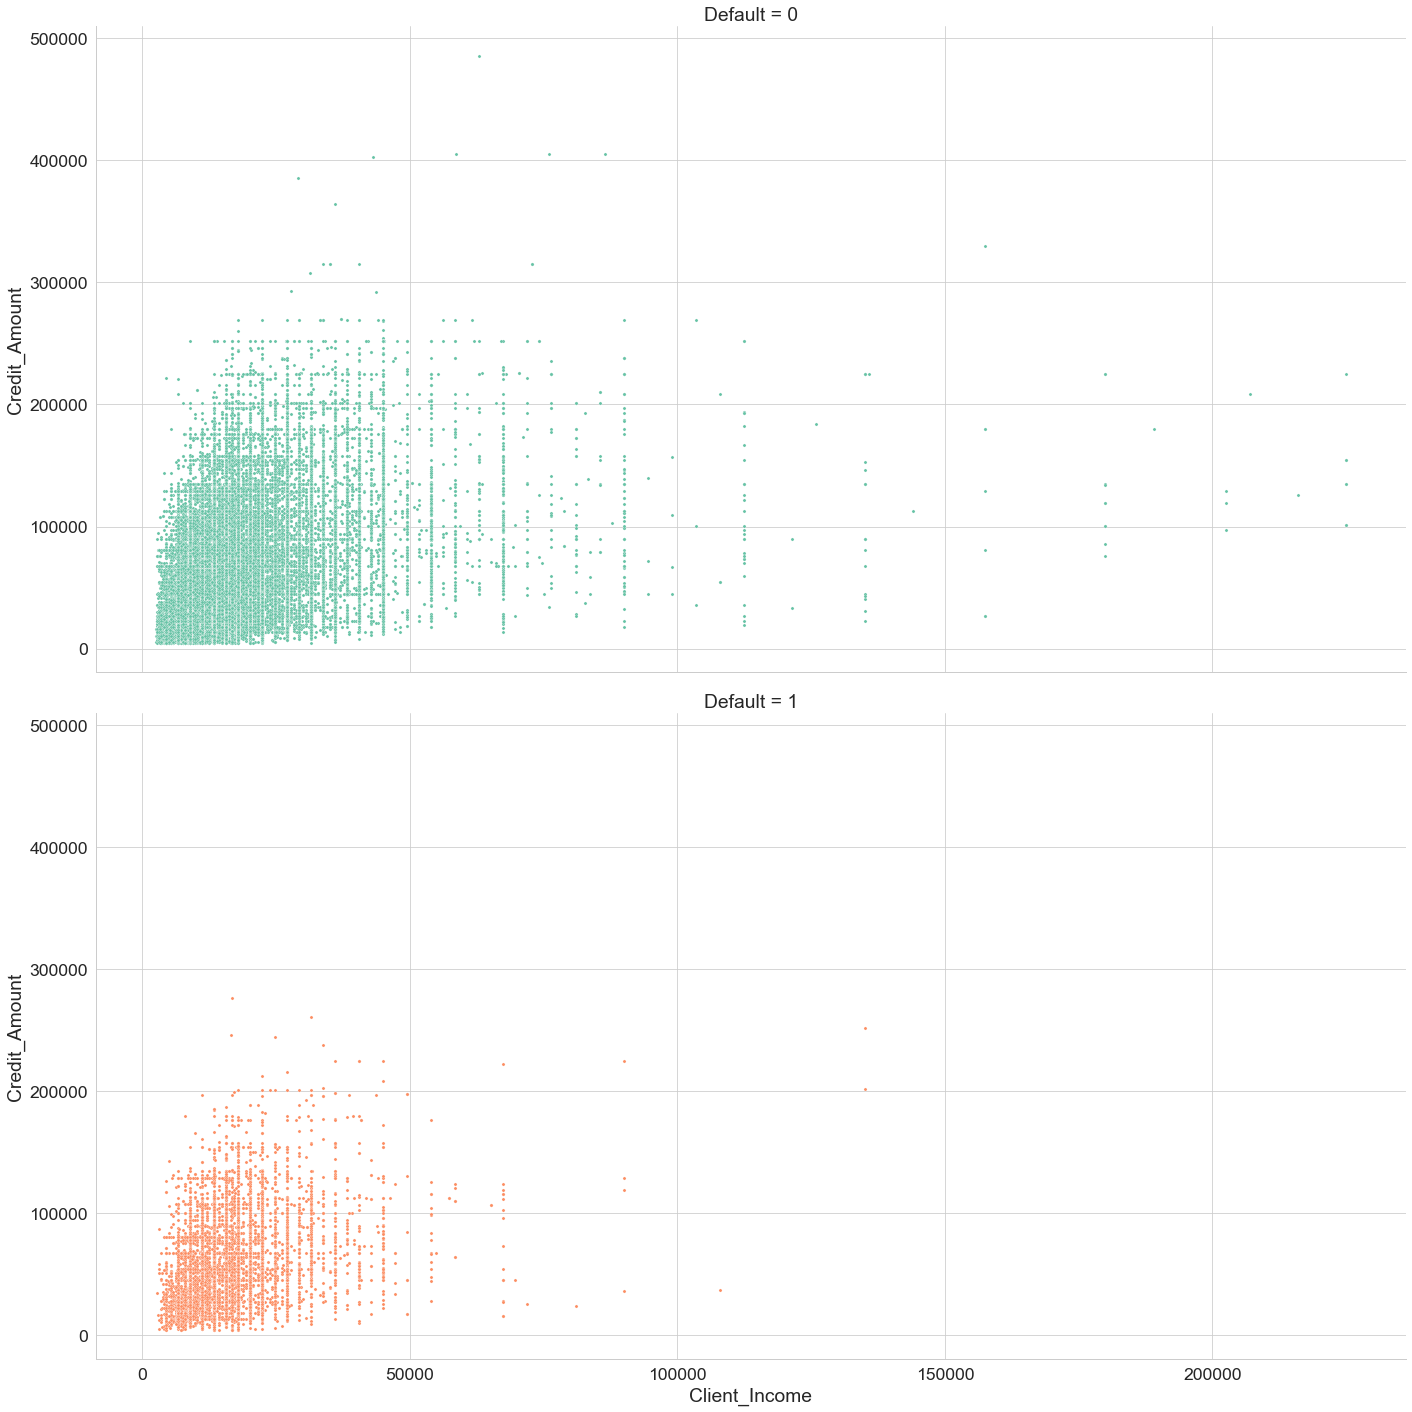

In [30]:
plt.figure(figsize=(12,6),dpi=200)
b = sns.FacetGrid(data= no_outlier, row = 'Default',height=10,aspect=2,hue='Default',palette="Set2")
b.map_dataframe(sns.scatterplot, x= 'Client_Income',y='Credit_Amount',s=10)

As same as the histogram, most scatter points are located in the left bottom corner.\
So we zoom in the plot to have more clear view.

<Figure size 2400x1200 with 0 Axes>

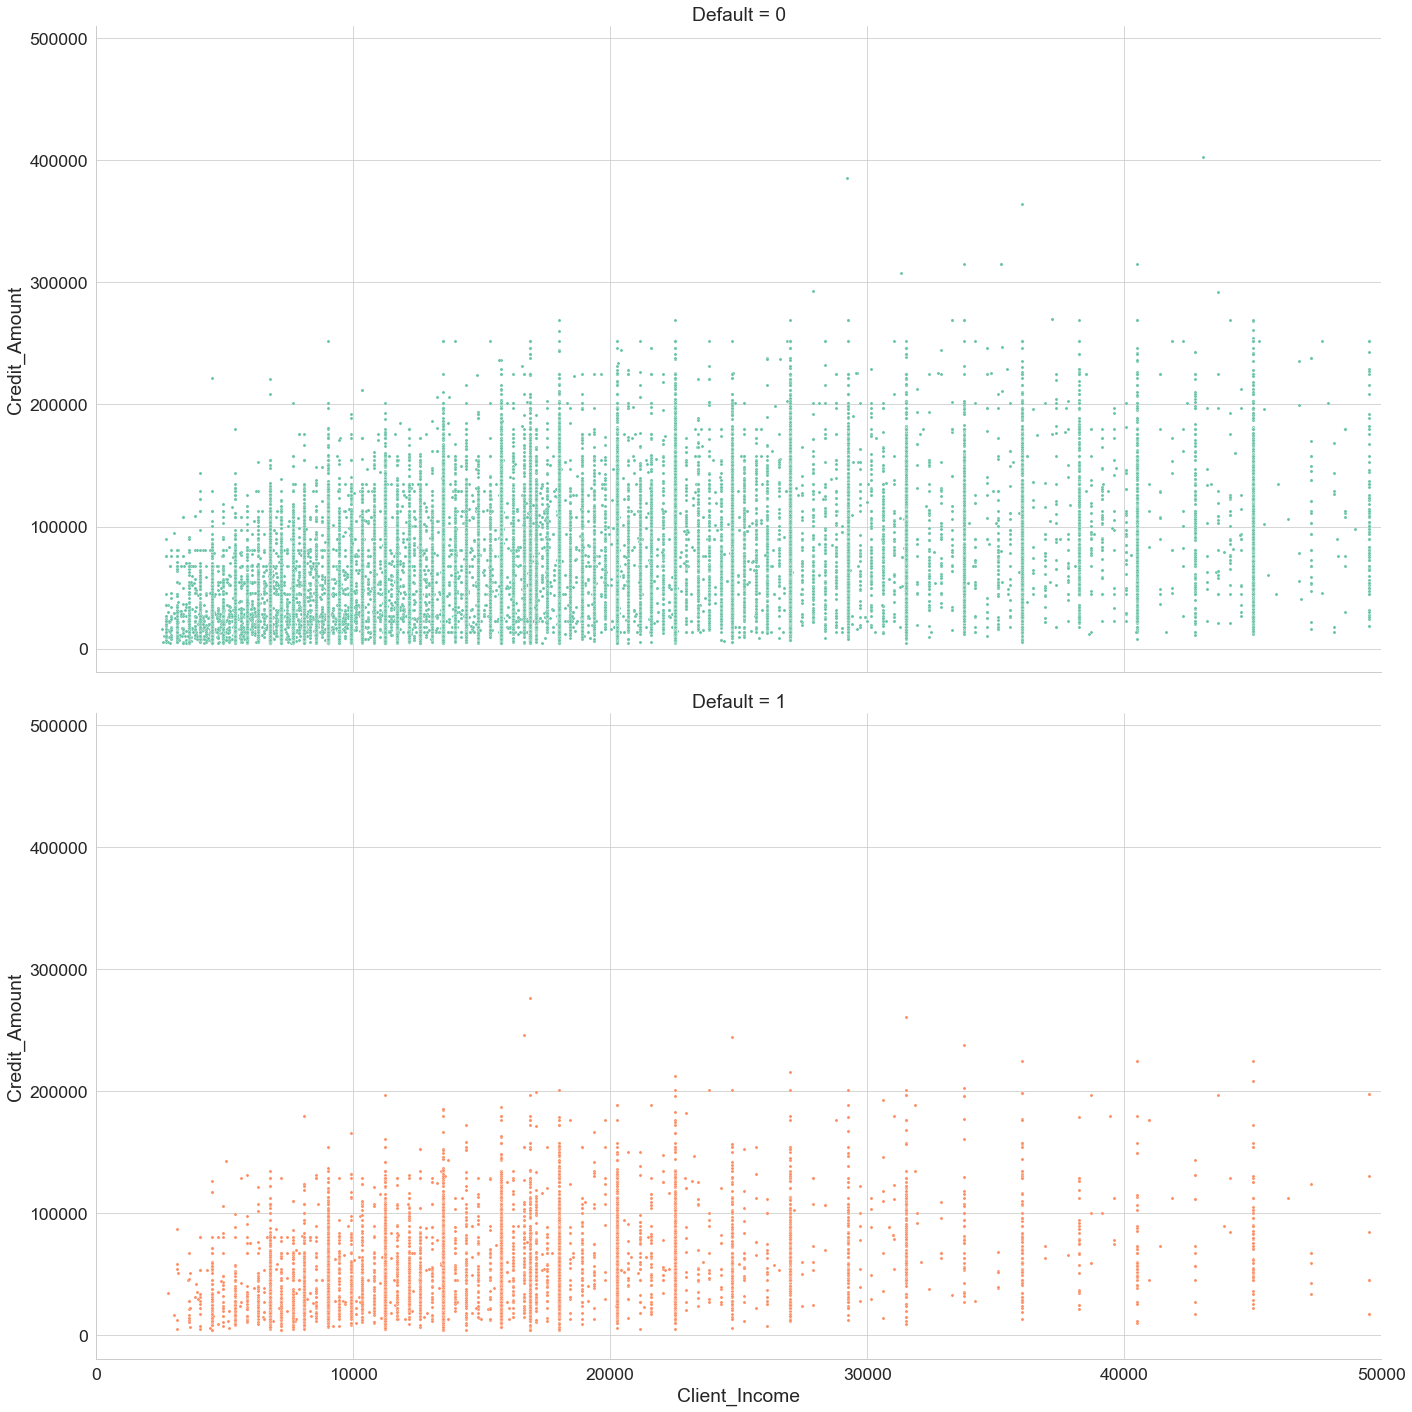

In [31]:
plt.figure(figsize=(12,6),dpi=200)
b = sns.FacetGrid(data= no_outlier, row = 'Default',height=10,aspect=2,xlim=(0,50000),hue='Default',palette="Set2")
b.map_dataframe(sns.scatterplot, x= 'Client_Income',y='Credit_Amount',s=10)
sns.set()

From above Scatter Plot, we have some findings:
1. We may see a lot of dots that forms a vertical line, that shows when gathering the income data, the numbers are in aprroximate form, instead the accurate number such as the numbers show on the tax filing.
2. There is a little pattern between income and credit amount: With more income, there will be more credit amount. But the weak correlation also make sense since the credit amount is directly affected by the price of the vehicle that clients want to buy.
3. Except for the non default group has wider range and distribution (high variance), we can't not tell any significant difference between group.


## Employed Years Analysis - Bar Chart

We now look at relation between Employed_Year and Default Columns
In order to investigate the relationship between the length of time a customer has been employed and their likelihood of defaulting, we created a new dataset called employed_yrs_distribution. 

This dataset includes a column indicating the percentage of customers who defaulted for each employed year group. 

We will visualize this data with a bar chart.
We also plot a line chart on top indicating the moving average value of default_percantage on top of the bar chart to show the trend

In [32]:
# group the data by employed_years and default, and calculate the count and sum for each group
employed_yrs_distribution=(loan.groupby('Employed_Years')['Default']
          .agg(['sum', 'count'])
          .rename(columns={'sum': 'number_defaults', 'count':'number_customers'})).reset_index()
                           
#divide sum by count to get percentage of defaults
employed_yrs_distribution['default_percentage'] = (employed_yrs_distribution['number_defaults'] / employed_yrs_distribution['number_customers']) * 100                           

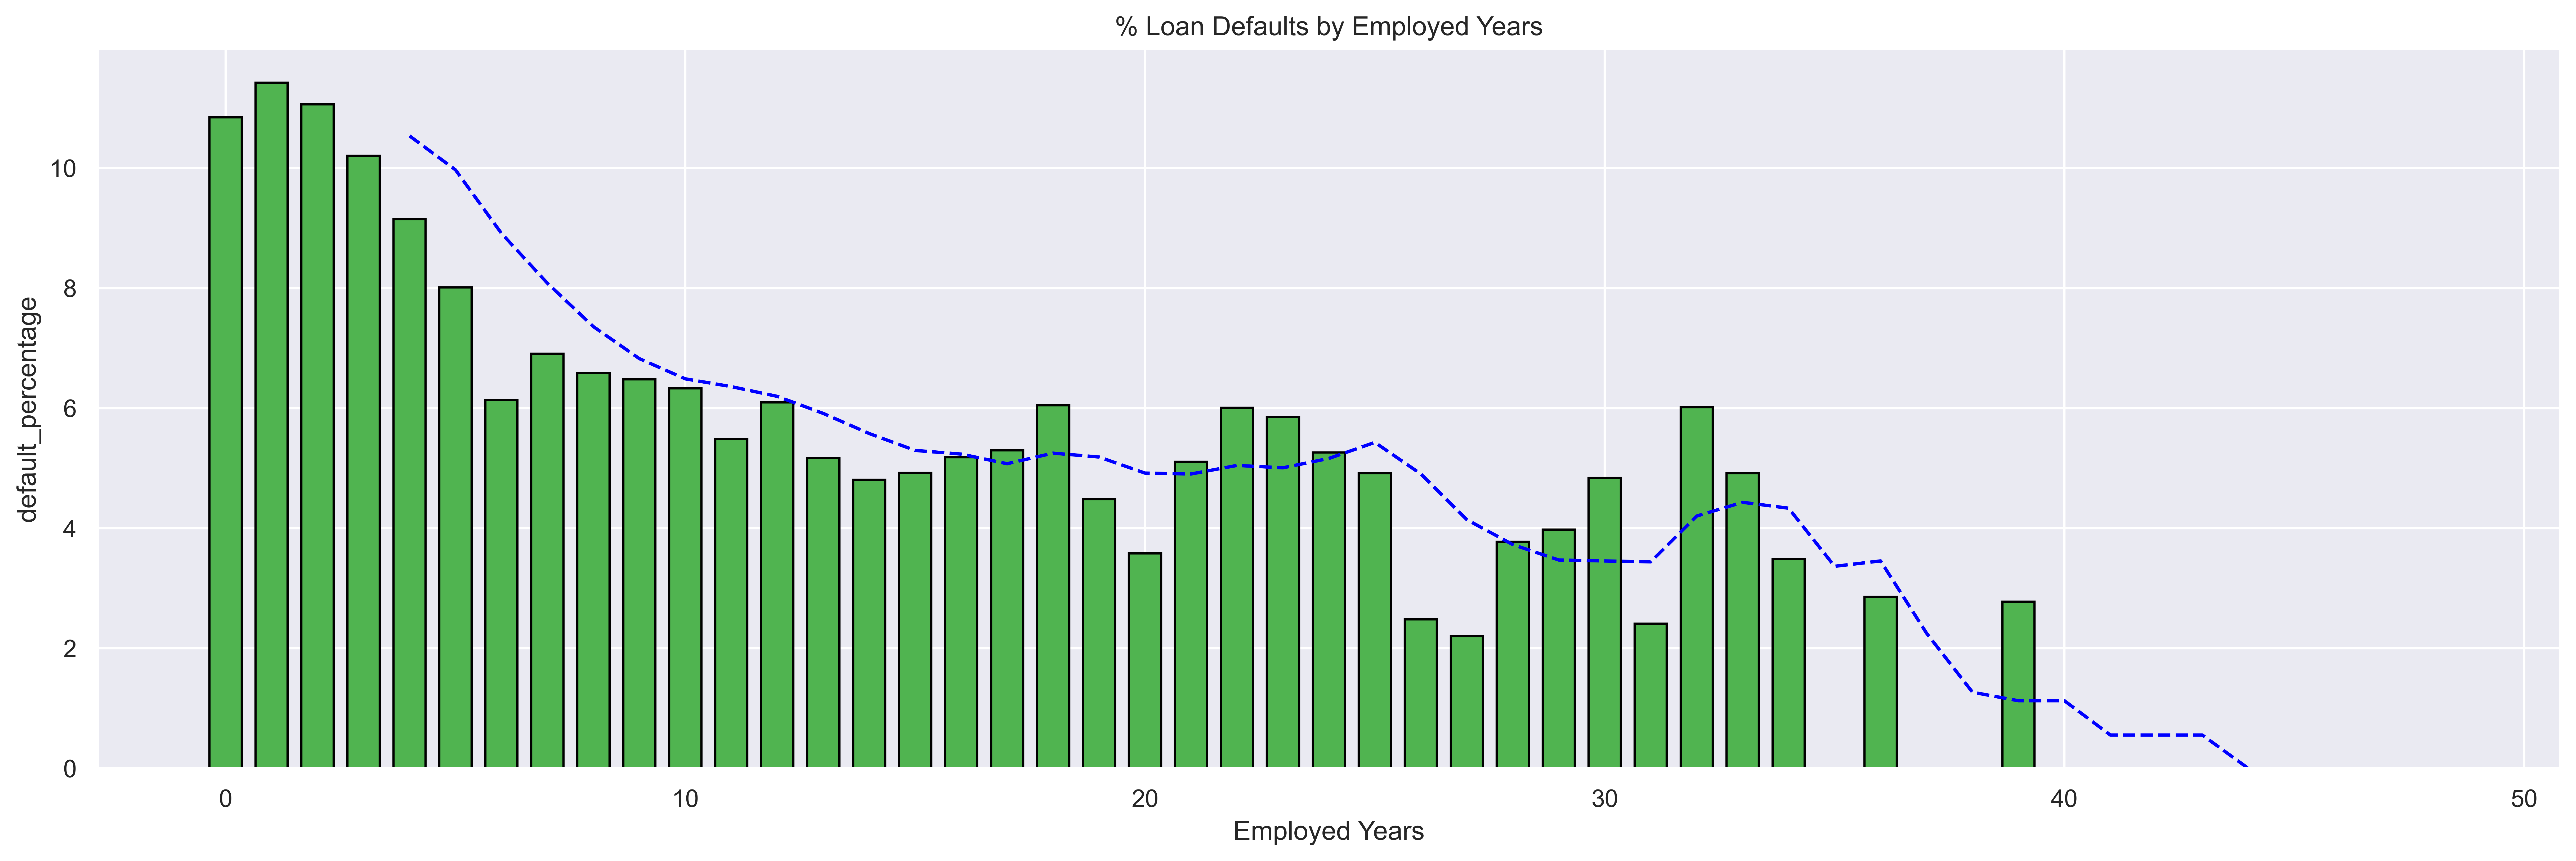

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6),dpi=600)
# add labels and title
plt.xlabel('Employed Years')

plt.ylabel('default_percentage')
plt.title('% Loan Defaults by Employed Years')

# create a bar plot with y=default_percentage and x=Employed_Years
plt.bar(employed_yrs_distribution['Employed_Years'],employed_yrs_distribution['default_percentage'] ,
       width =0.7, color=(80/255, 180/255, 80/255), edgecolor='black')
moving_avg = employed_yrs_distribution['default_percentage'].rolling(window=5).mean()
plt.plot(employed_yrs_distribution['Employed_Years'], moving_avg, color='blue', linestyle='--', label='Moving average')


plt.show()

The aforementioned graph demonstrates a clear and consistent relationship between the number of employed years and the likelihood of defaulting. \
As Employed_Years increase, we observe a sharp decline in the percentage of defaulting customers until reaching a plateau at around 6 years, followed by a gradual decrease and another sharp decline after the 25-year mark.

Based on this pattern, we can confidently state that employed years play a significant role in predicting a customer's probability of defaulting. \
By integrating this feature into our models, we can effectively enhance their predictive accuracy.

## Income Type and Income Factor Analysis - Bar Chart

For bar chart, we combine the income type and the income factor.\
The black line refers to the standard variance of the income.

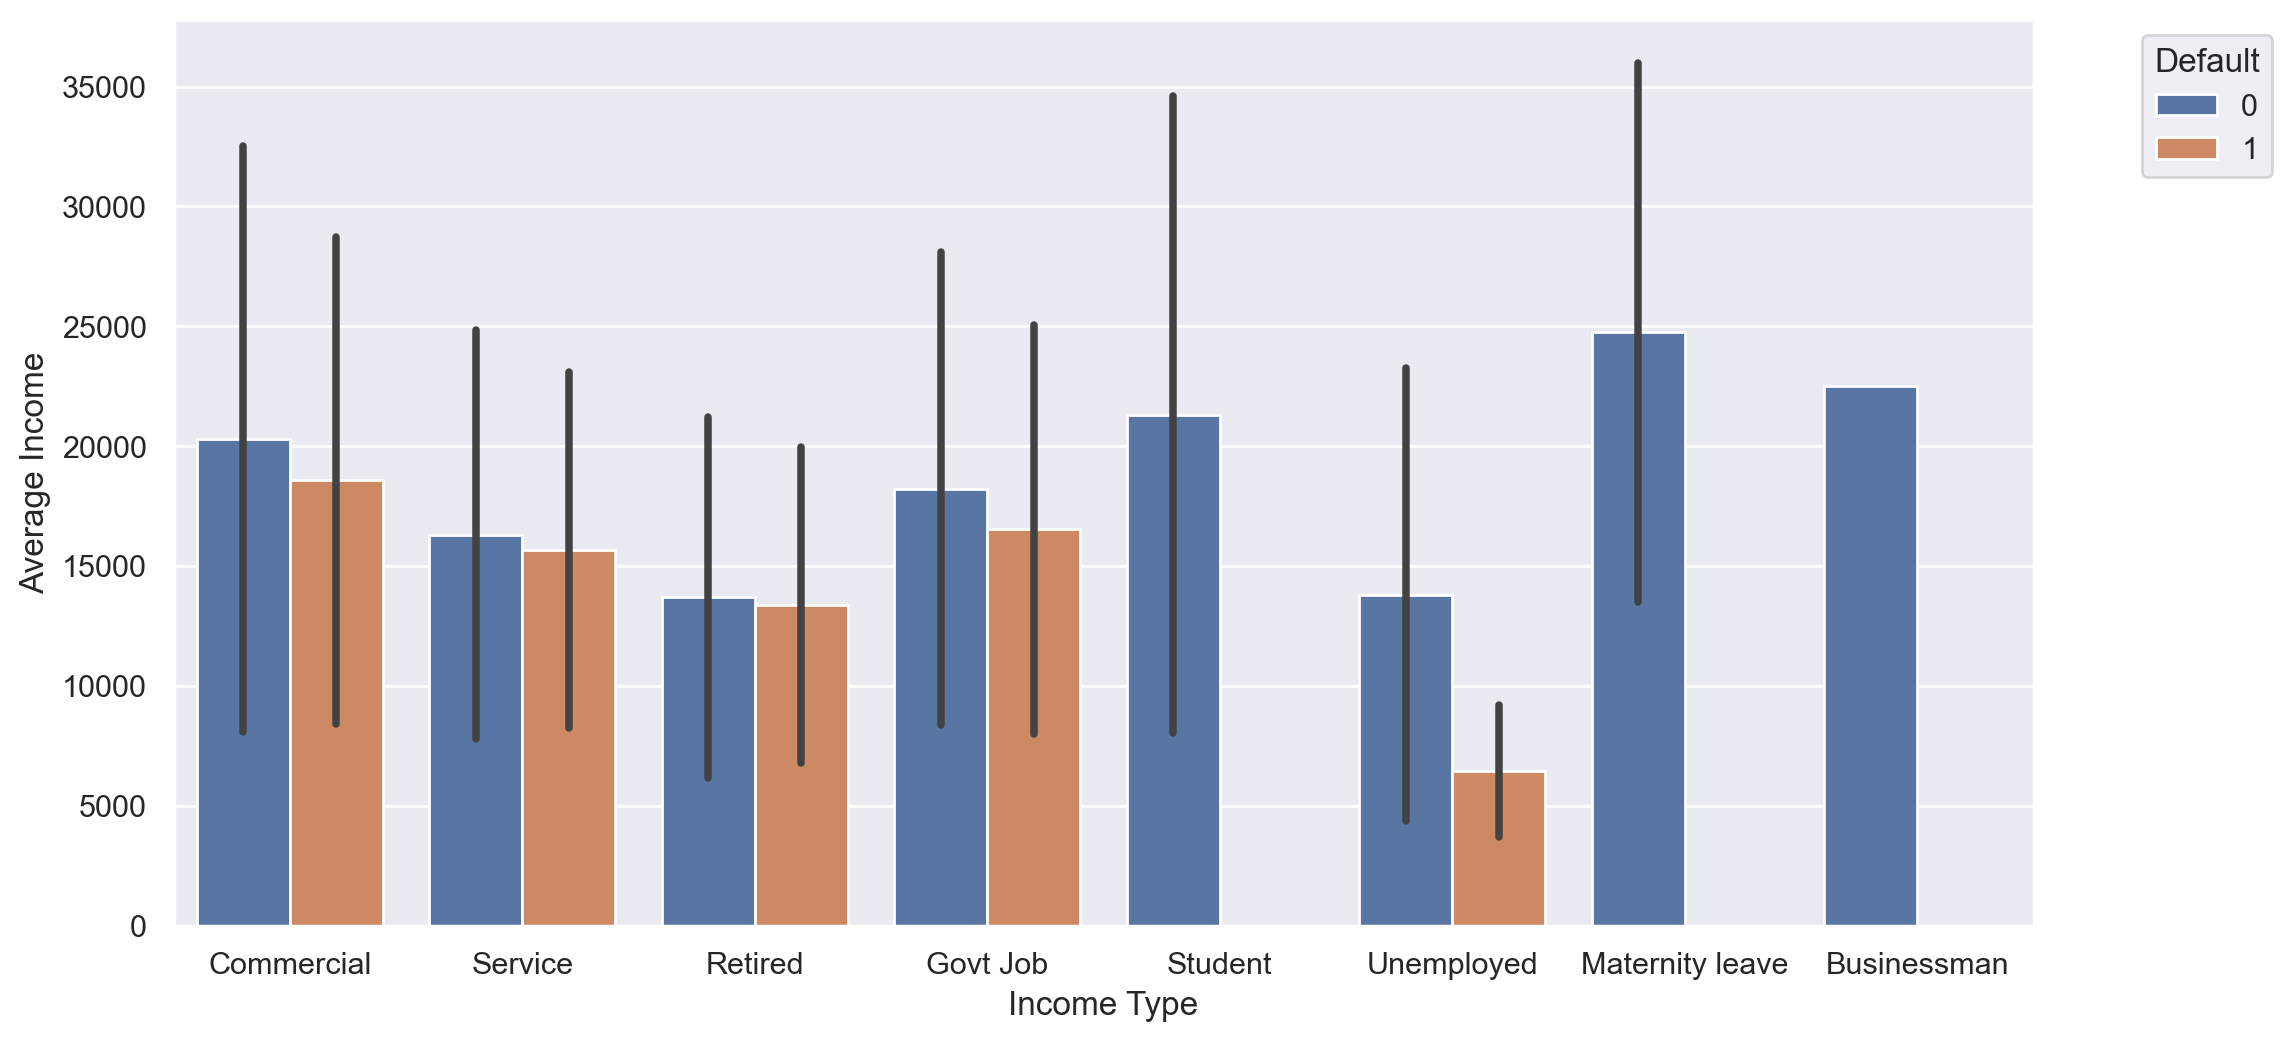

In [34]:
plt.figure(figsize=(12,6),dpi=200)
d = sns.barplot(data=no_outlier,x='Client_Income_Type', y='Client_Income',estimator=np.mean,ci='sd',hue='Default')
#ci parameter controls the black stick on each bar, stands for confidence interval, with 'sd' we make the black stick represents the standard deviation

d.set_xlabel('Income Type')
d.set_ylabel('Average Income')
plt.legend(title="Default",bbox_to_anchor=(1.05,1)) #move the legend outsiede the plot

For the bar chart, we have following findings:
1. Some income types do not have defaulted client, the reason might because the numbers of these type are extremely low, they might be considered outliers, but we are not going to do anything on them since we are only doing visualization.
2. To some degree, the income type reflect the average income correctly, but not totally based on common sense, such as student and Maternity leave have highest average income, same as above point, this might because the numbers of these type are extremely low.
3. The black stick on top of each bar represents the standard deviation, for most categories the variance are high, except for the defaulted unemployed and retired groups.
4. In this graph, we can have a clear pattern on the income factor that in each income type, defaulted group has lower average income than non default group.

## Car Owned Analysis - Pie Chart

We aim to investigate whether car ownership has any effect on a customer's likelihood of defaulting. 
To achieve this, we will plot two pie charts, one for the case where Car_Owned equals 0 and another for the case where Car_Owned equals 1.

To avoid code duplication, we define a function that will take a dataset, subplot, and the Car_Owned value as arguments. 
The function will then calculate the percentage of customers who defaulted and who did not for the given Car_Owned value.
Finally, the function plots a pie chart to visualize the calculated percentages.

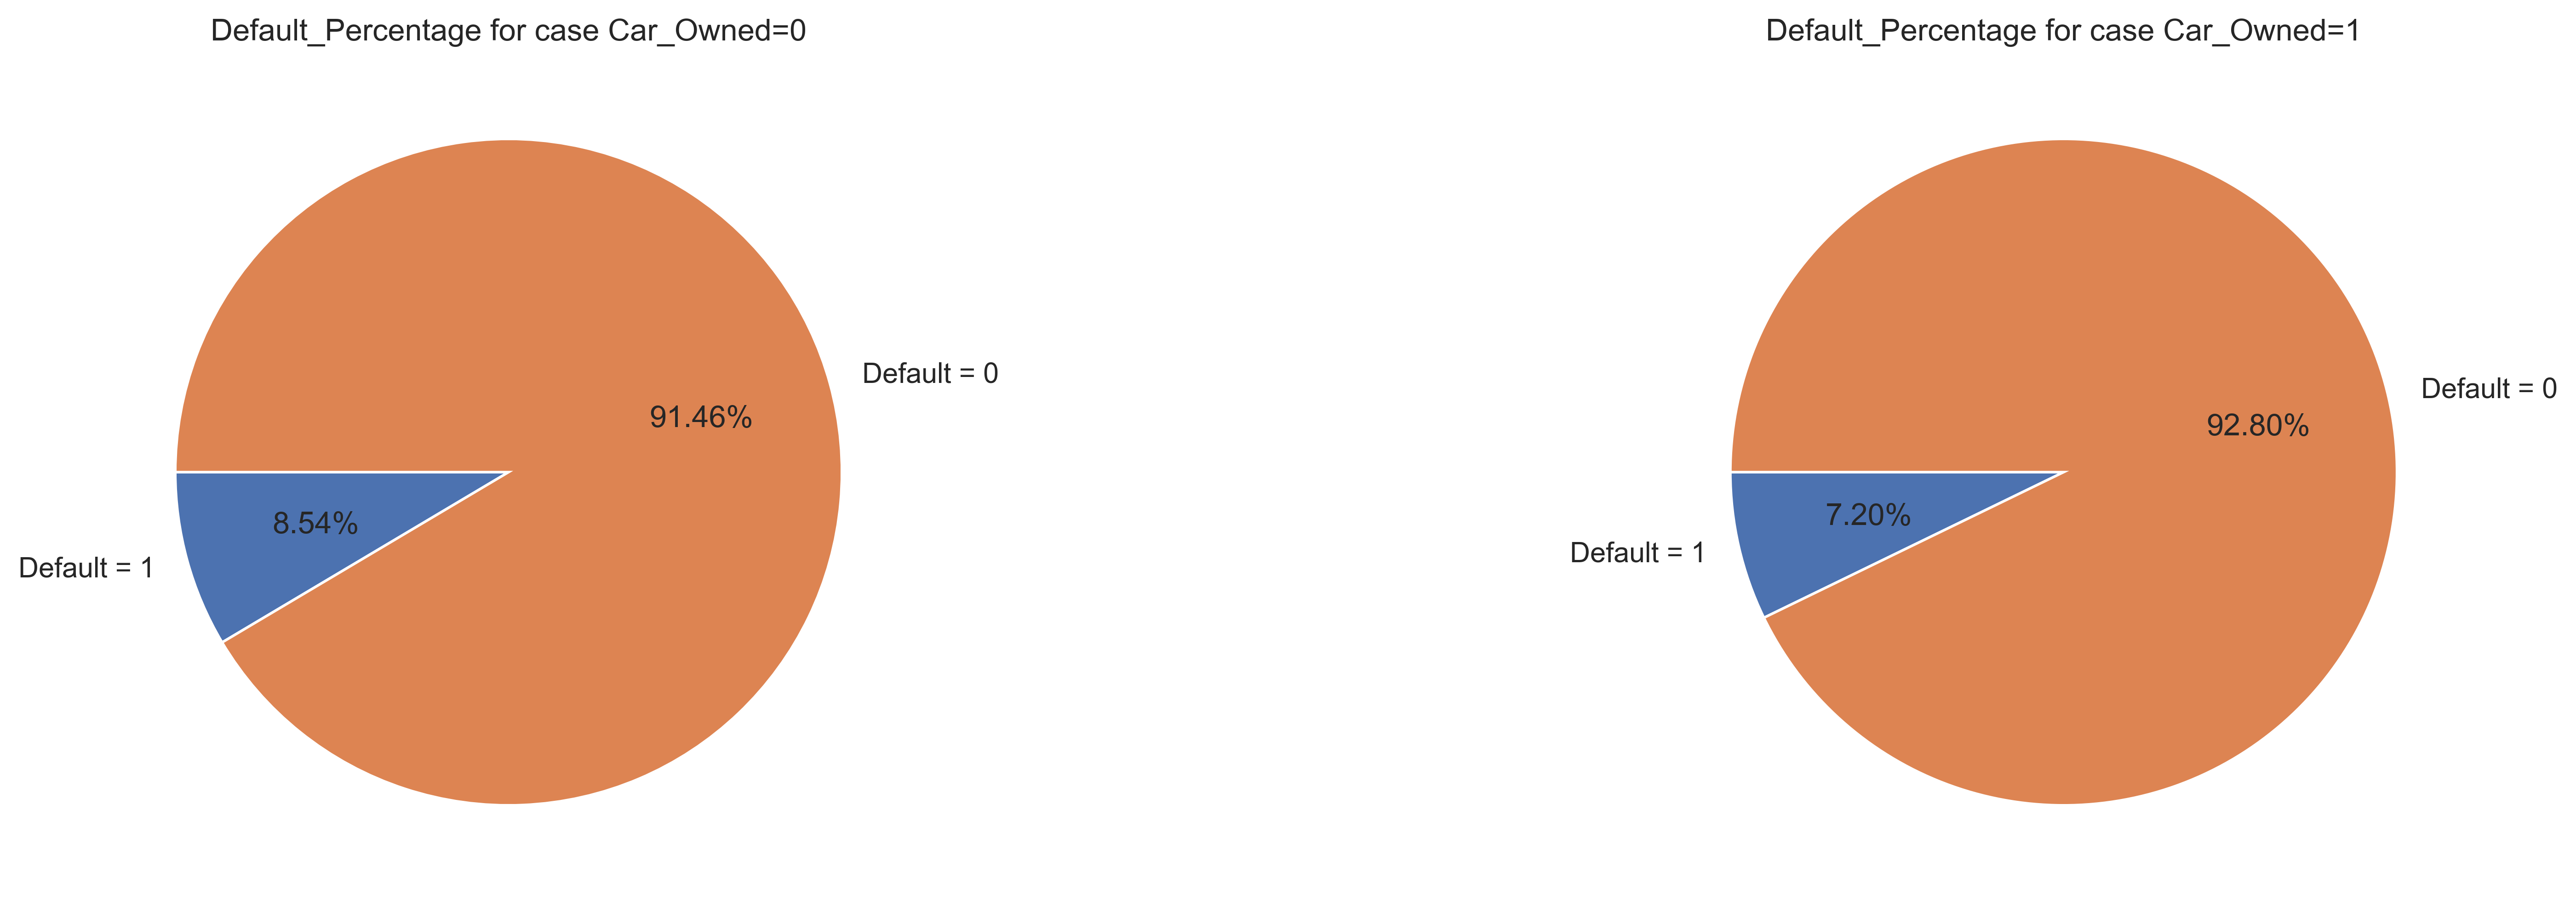

In [35]:
import matplotlib.pyplot as plt

def plot_pie_chart(df, ax, car_owned_value):
    default_fraction = df['Default'].sum() / df['Default'].count()
    slices = [default_fraction, 1 - default_fraction]
    labels = ['Default = 1', 'Default = 0']
    ax.pie(slices, labels = labels,
    startangle=180,
    radius = 1, autopct = '%2.2f%%')
    ax.set_title(f'Default_Percentage for case Car_Owned={car_owned_value}')
    
fig, axs = plt.subplots(1, 2, figsize=(20, 6),dpi=400)
plot_pie_chart(loan[loan['Car_Owned']==0], axs[0],0)
plot_pie_chart(loan[loan['Car_Owned']==1], axs[1],1)

plt.show()

As we can see from above plots, the difference between default_percentages for the two cases is not that much different
The difference is only 1.3\
Based on the above pie charts, we observe that the difference between the default percentages for the two cases is quite small, with only a 1.3% difference between them. This small difference suggests that owning a car may not be a significant factor in determining a customer's likelihood of defaulting.
This small amount of difference indiactes that Car_Owned might not be a signifcant factor that can influence a customers likelihood for defaulting

## Education Level Analysis - Pie Chart

For the pie chart, we want to see if the education level has any correlation with default.

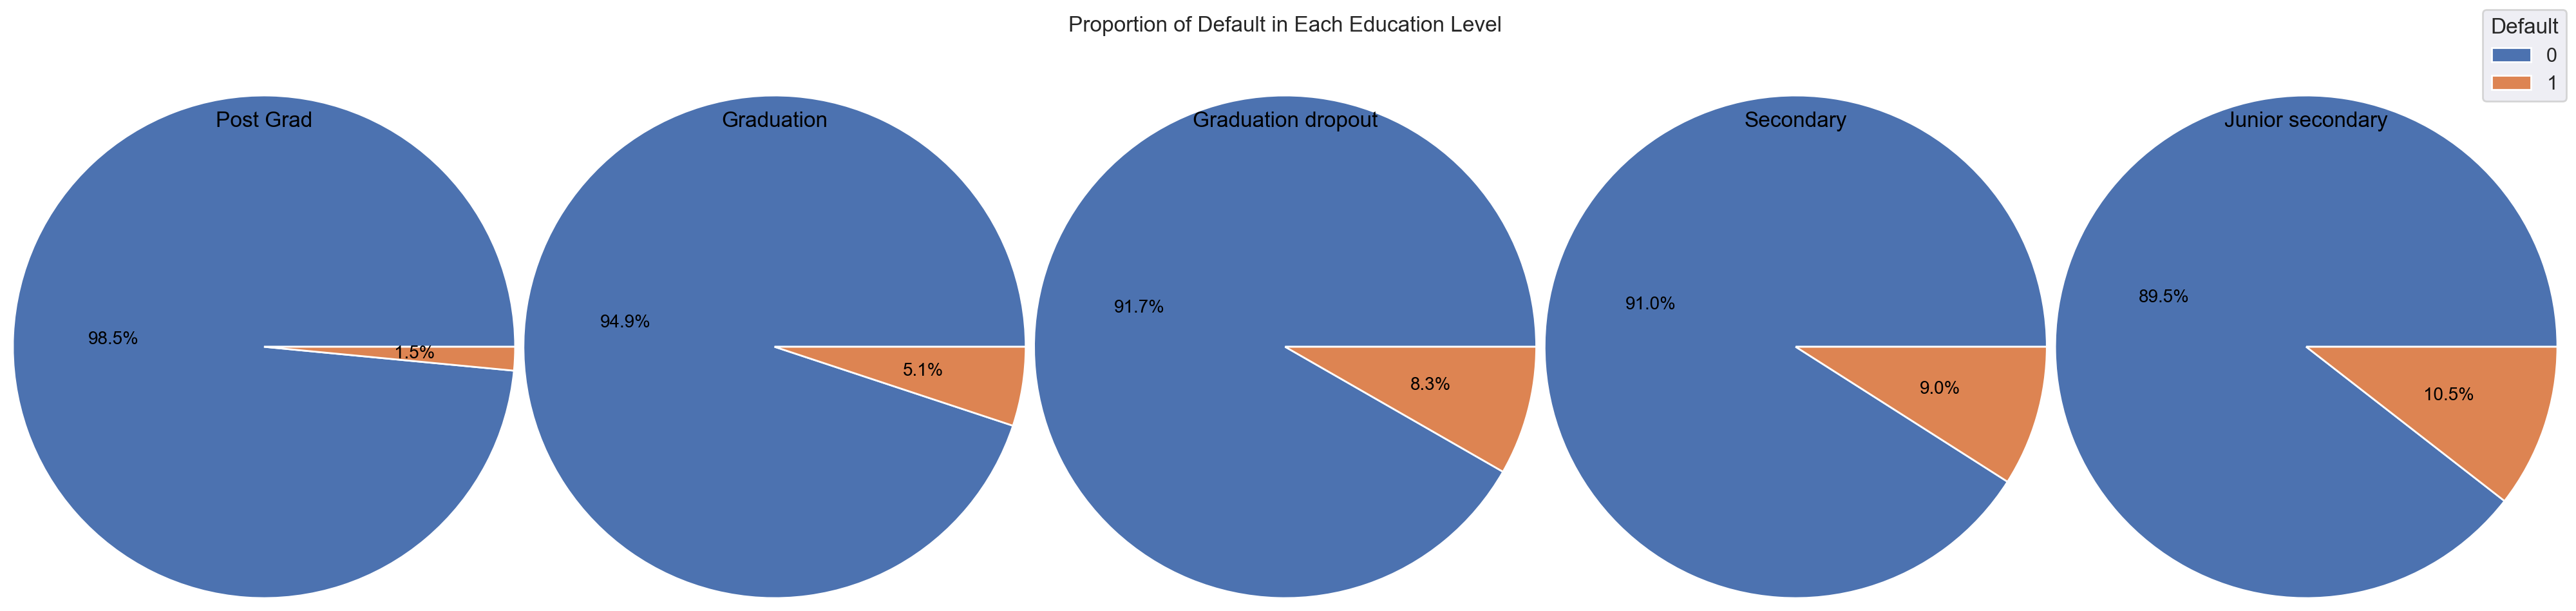

In [36]:
fig,new_axes = plt.subplots(nrows=1,ncols=5,dpi=200,figsize=(20,5)) 

edu_lvl = np.array(['Post Grad','Graduation','Graduation dropout','Secondary','Junior secondary'])
for i in range(5):
    new_axes[i].pie(x = no_outlier[no_outlier['Client_Education']==edu_lvl[i]]['Default'].value_counts(1), radius=1.5,autopct='%.1f%%',textprops={'color':'black', 'size':10}) #[0][0]，代表x=0, y=0
    new_axes[i].set_title(edu_lvl[i],fontdict={'color':'black'}) 


fig.suptitle('Proportion of Default in Each Education Level',fontsize=12)
fig.tight_layout()

fig.legend(no_outlier['Default'].unique(),title="Default")


As we can see above pie chart, with higher education level, the proportion of Default client is getting lower.

## Registration_Years Analysis - Line Plot

Next, we examine the correlation between the Registration_Years and Default Columns.

To investigate whether the duration of registration has an impact on customer defaulting behavior, we created a new dataset called reg_yrs_distribution.

This dataset includes a column indicating the percentage of customers who defaulted for each registration year group.

We will visualize this data with a line chart to see the trend of default percentage against registration years.

In [37]:
reg_yrs_distribution=(loan.groupby('Registration_Years')['Default']
          .agg(['sum', 'count'])
          .rename(columns={'sum': 'number_defaults', 'count':'total_rows'})).reset_index()

reg_yrs_distribution=reg_yrs_distribution[reg_yrs_distribution['total_rows']>0]                           
reg_yrs_distribution['default_percentage'] = (reg_yrs_distribution['number_defaults'] / reg_yrs_distribution['total_rows']) * 100

reg_yrs_distribution['percentage_of_total_entries']=reg_yrs_distribution['total_rows']*100.0/len(loan.index)
print(len(reg_yrs_distribution.index))
reg_yrs_distribution

61


,Registration_Years,number_defaults,total_rows,default_percentage,percentage_of_total_entries
0,0.0,665,6463,10.289339,5.303801
1,1.0,561,6089,9.213336,4.996882
2,2.0,528,5745,9.190601,4.714581
3,3.0,413,5001,8.258348,4.104024
4,4.0,333,4245,7.844523,3.483620
...,...,...,...,...,...
56,57.0,0,1,0.000000,0.000821
57,58.0,0,1,0.000000,0.000821
58,59.0,0,1,0.000000,0.000821
59,62.0,0,1,0.000000,0.000821


We noticed that some groups in the Registration_Years column have very few entries.\
This can result in a noisy plot that is difficult to interpret. \
To address this issue, we have decided to exclude groups with fewer than 150 entries. \
This will help us obtain a more accurate and reliable trend of default percent against registration years.

In [38]:
reg_yrs_distribution=reg_yrs_distribution[reg_yrs_distribution['total_rows']>=150]
print(len(reg_yrs_distribution.index))

41


Additionally, we will add an extra line to the plot using the moving average to better visualize the trend. \
This will help smooth out any oscillations in the data and give a clearer picture of the relationship between Registration_Years and Default.

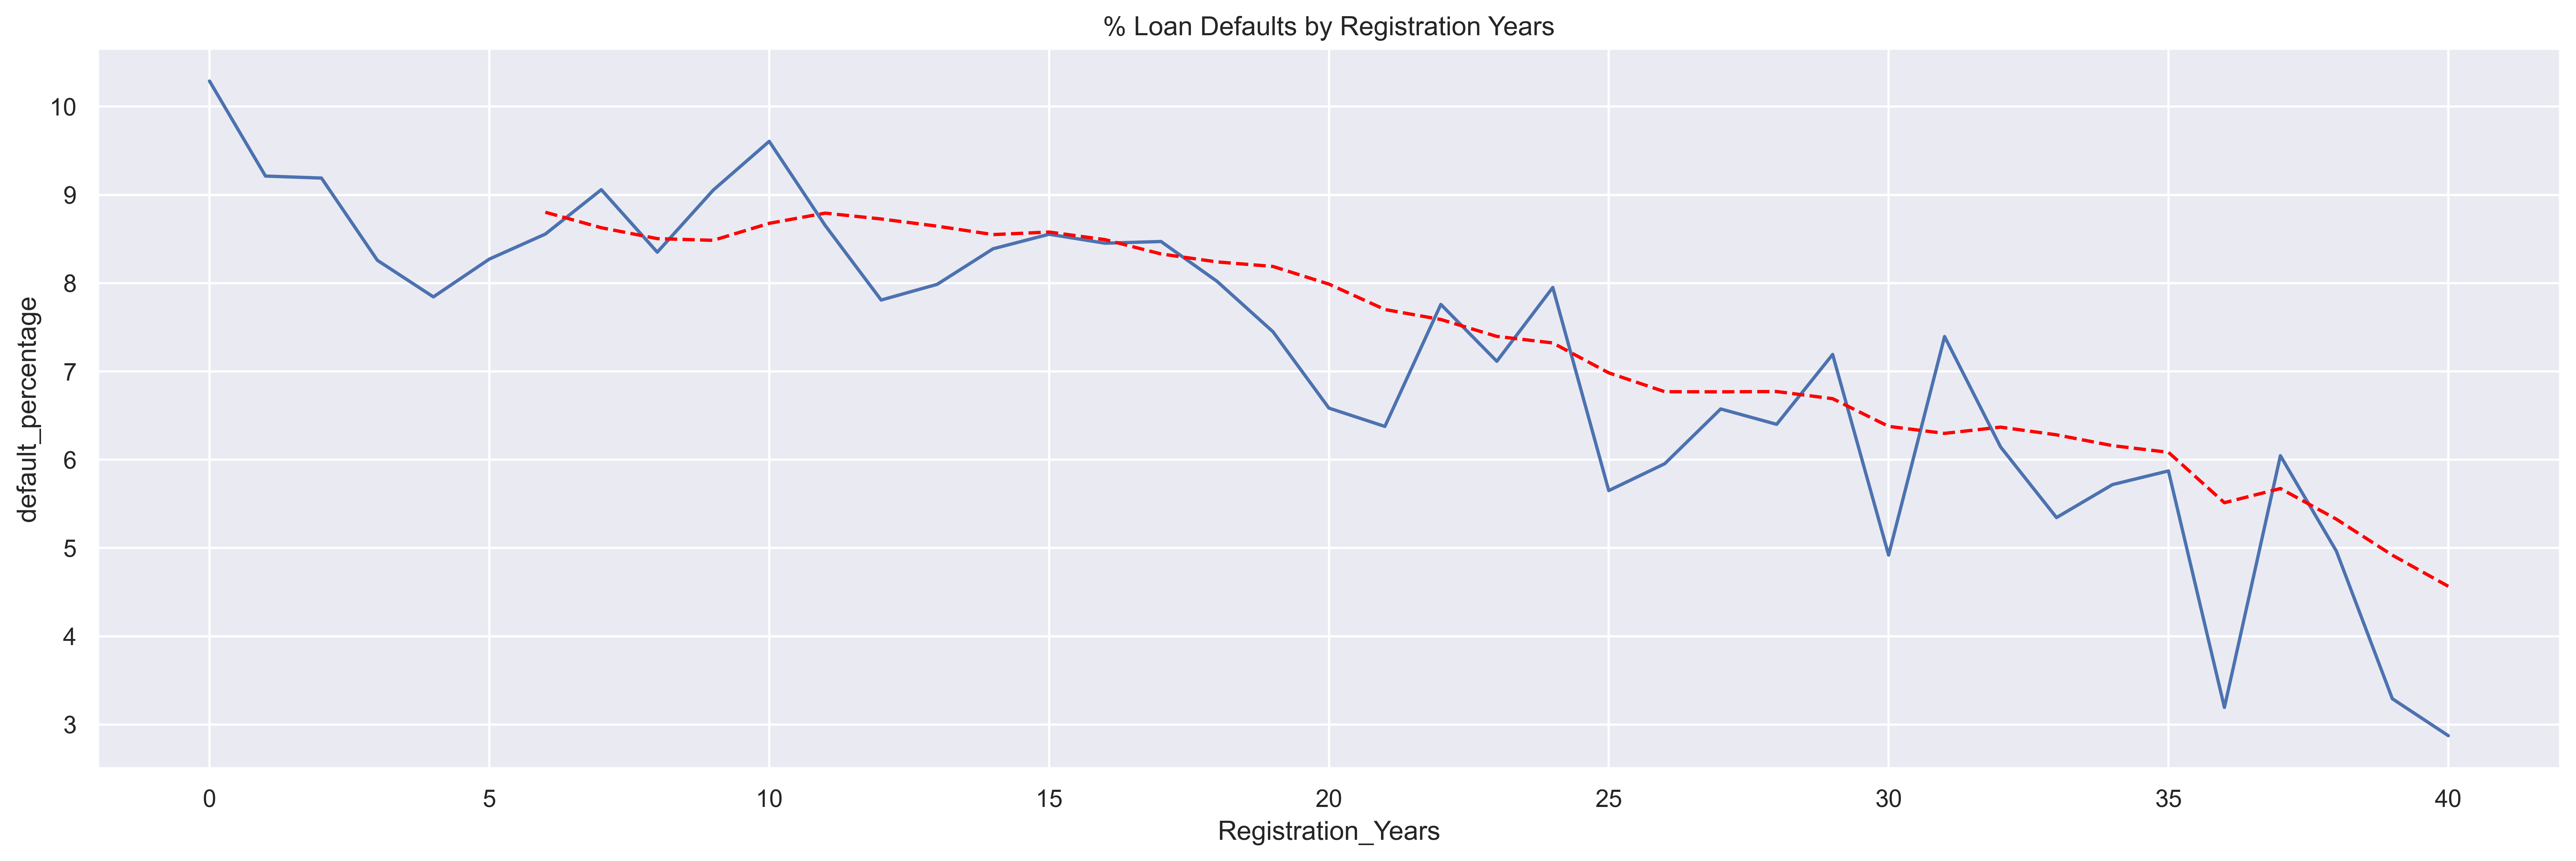

In [39]:
# group the data by employed_years and default, and calculate the count
 
plt.figure(figsize=(20, 6), dpi=600)
#employed_yrs_distribution.plot(y='default_percentage',x='Employed_Years',kind='bar', rot=0, color=['green'])

plt.plot(reg_yrs_distribution['Registration_Years'],reg_yrs_distribution['default_percentage'])
moving_avg = reg_yrs_distribution['default_percentage'].rolling(window=7).mean()
plt.plot(reg_yrs_distribution['Registration_Years'], moving_avg, color='red', linestyle='--', label='Moving average')

# add labels and title
plt.xlabel('Registration_Years')
plt.ylabel('default_percentage')
plt.title('% Loan Defaults by Registration Years')

#show the plot
plt.show()

Based on the above graph, we observe that there is a clear trend indicating that the likelihood of defaulting decreases as the number of registration years increases. \
Therefore, we can conclude that registration years can be considered a significant factor in predicting a customer's likelihood of defaulting.\
This feature can be incorporated in our models to improve their predictive power.

## Age and Loan Duration Analysis - Line Chart

For the line chart, we are interested in the relationship of age and loan Duration, also how would two group perform under this two factor.

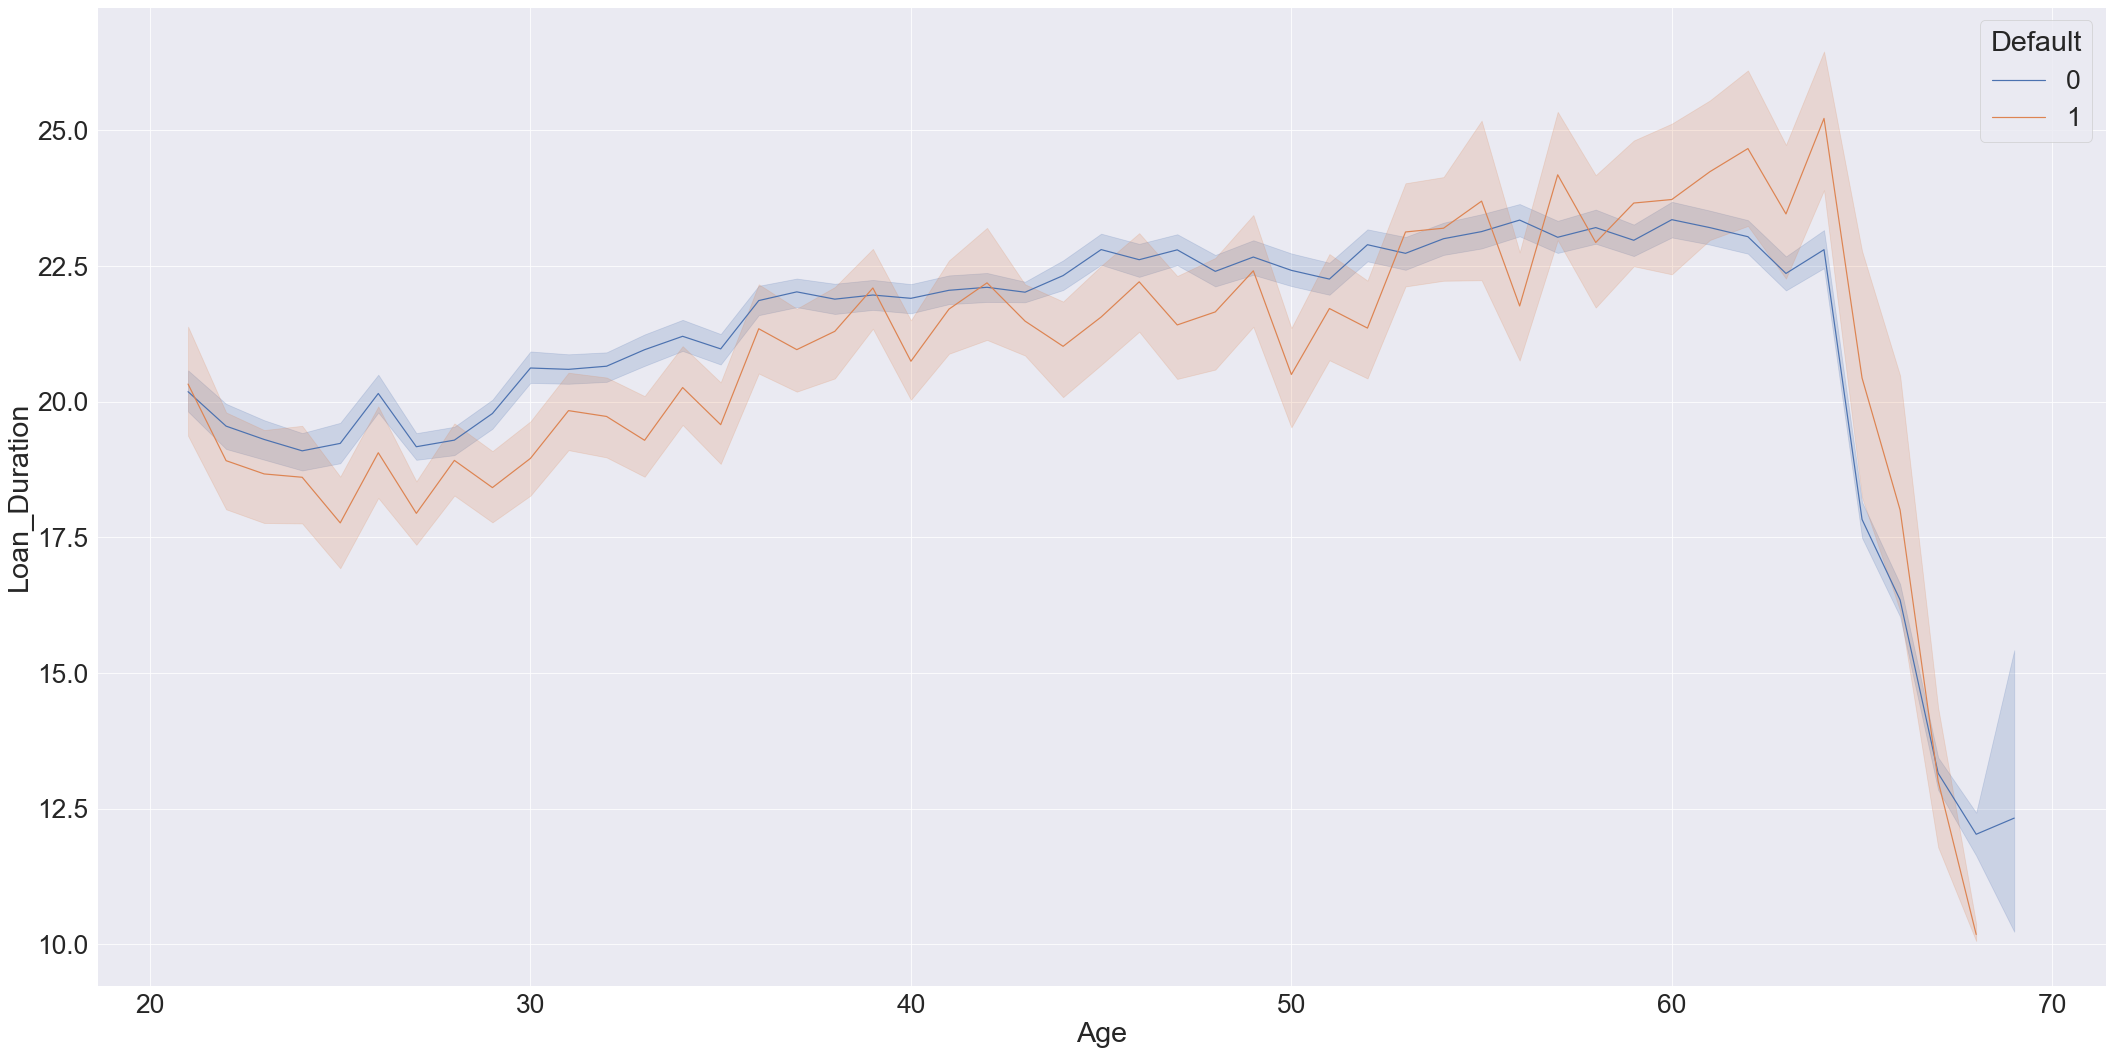

In [40]:
plt.figure(figsize=(36,18))
sns.set_context("paper",font_scale=3)
line = sns.lineplot(data=no_outlier,x = 'Age', y= 'Loan_Duration',hue='Default',estimator='mean')
sns.set()

For the above line chart:

1. It's quiet interesting that older people would have longer loan Duration
2. For the client younger than 55, the defaulted group has shorter loan Duration, but for the client older than 55, the default group would have longer loan Duration
3. The steep curve of the loan Duration after about 65 is making sense, since neither bank nor NBFI would offer long-term loan to elder people.

## Credit Score Analysis - Box Plot


For the box plot we are verifying the relationship of credit socre and default

<AxesSubplot:xlabel='Default', ylabel='Avg_Score'>

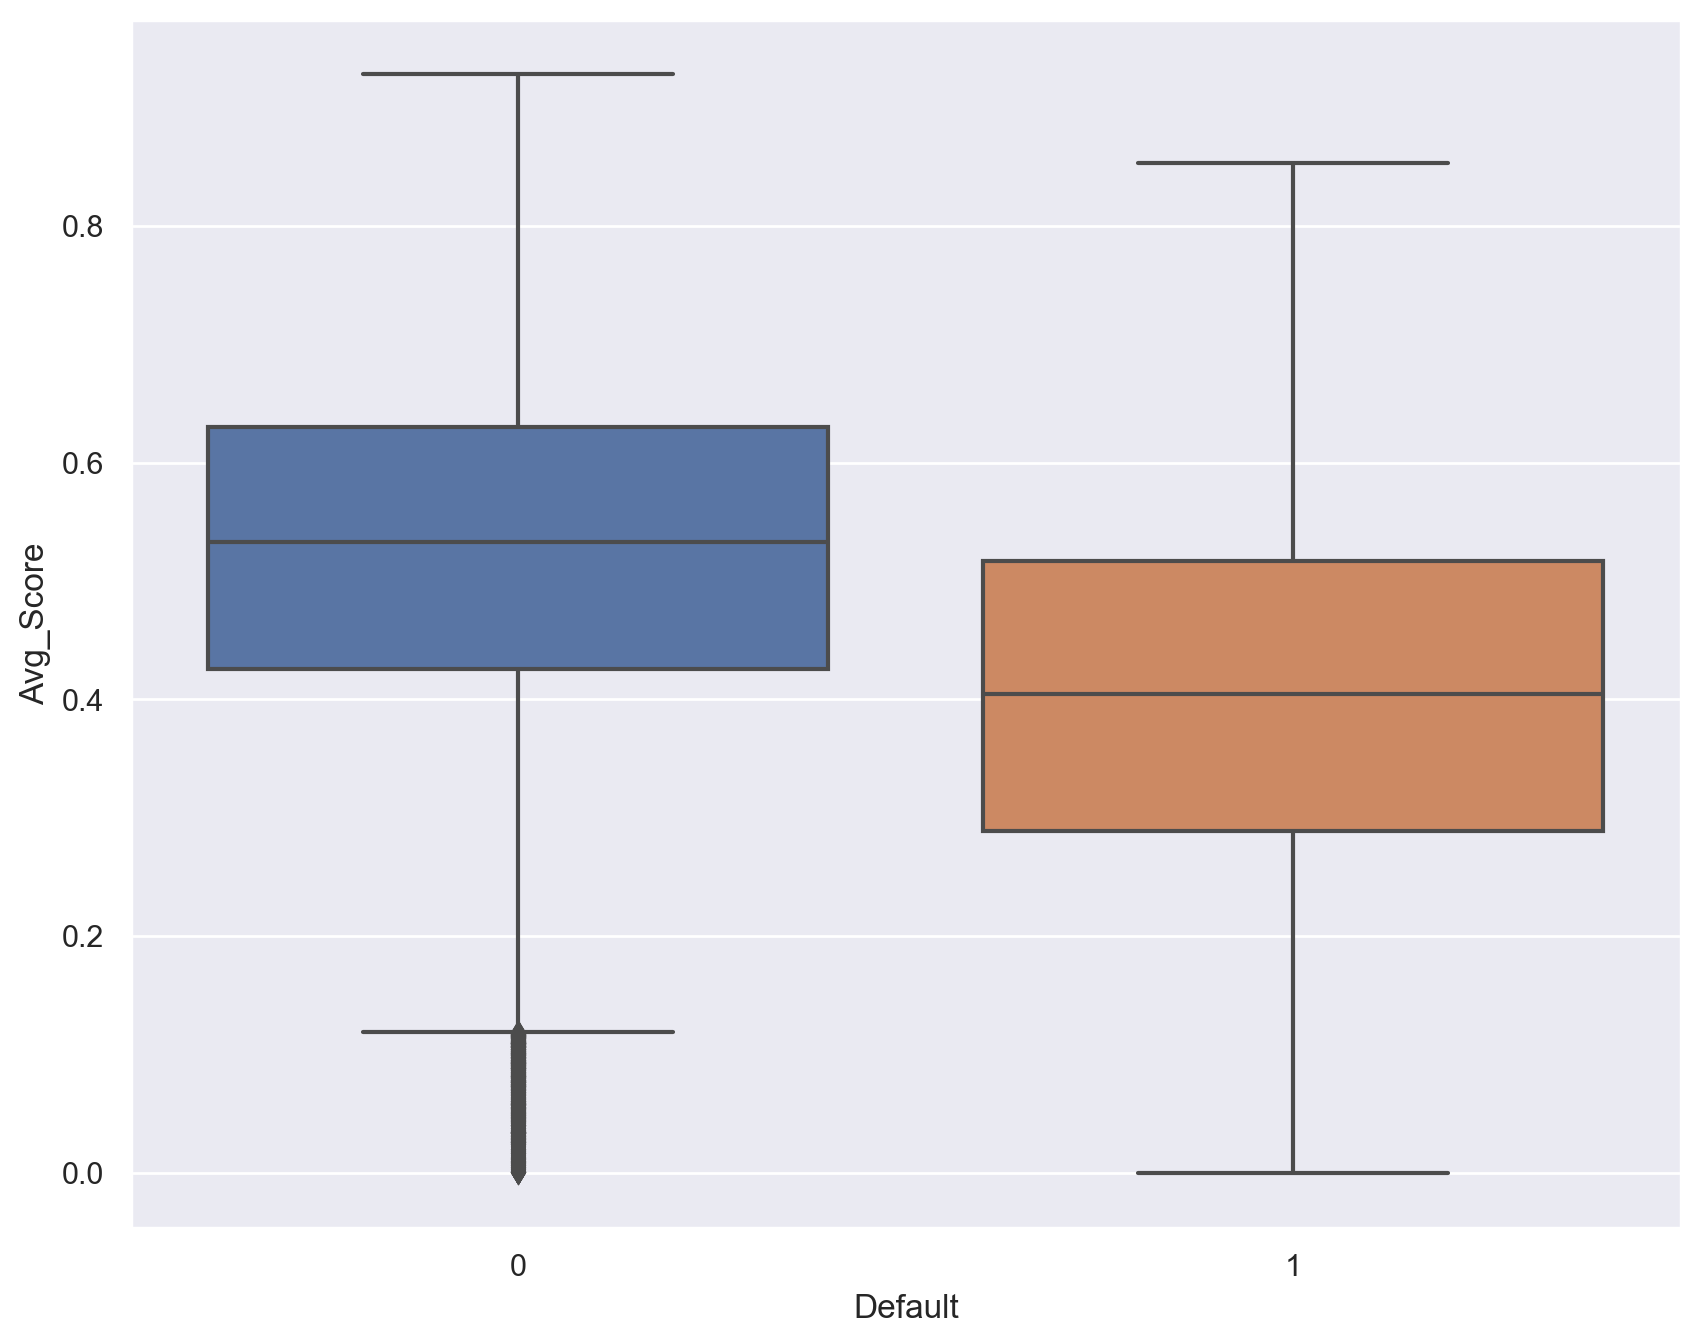

In [41]:
plt.figure(figsize=(10,8),dpi=200)
sns.boxplot(data=loan,x='Default',y='Avg_Score')

The average credit score might be the most intuitive factor to reflect the default or not, as we can see that the defaulted group has lower credit score for not matter in which scale, the minimun, maximun, upper or lower quartile and even medain.

## Application Process Day Analysis - Heat Map

The dataset gathered the application process day and hours, which indicates in which week day and what hour in a day that a client applied the loan ,\
which trigger our curious is there any necessity that we should gather these data to make the machine learning prediction model.\
So we use the heat map to verify is there any pattern on the occur times between two groups on these variables.

In [42]:
counts_default = no_outlier[no_outlier['Default']==1].groupby(['Application_Process_Day', 'Application_Process_Hour']).size().reset_index(name='Counts')
counts_nondefault= no_outlier[no_outlier['Default']==0].groupby(['Application_Process_Day', 'Application_Process_Hour']).size().reset_index(name='Counts')
pivot_table_default = counts_default.pivot_table(index='Application_Process_Hour', columns='Application_Process_Day', values='Counts', fill_value=0)
pivot_table_default = pivot_table_default.rename(columns={0.0: 'Sunday', 1.0: 'Monday',2.0:'Tuesday',3.0:'Wednesday',4.0:'Thursday',5.0:'Friday',6.0:'Saturday'})
pivot_table_nondefault = counts_nondefault.pivot_table(index='Application_Process_Hour', columns='Application_Process_Day', values='Counts', fill_value=0)
pivot_table_nondefault = pivot_table_nondefault.rename(columns={0.0: 'Sunday', 1.0: 'Monday',2.0:'Tuesday',3.0:'Wednesday',4.0:'Thursday',5.0:'Friday',6.0:'Saturday'})


Text(179.7, 0.5, 'Hours in a Day')

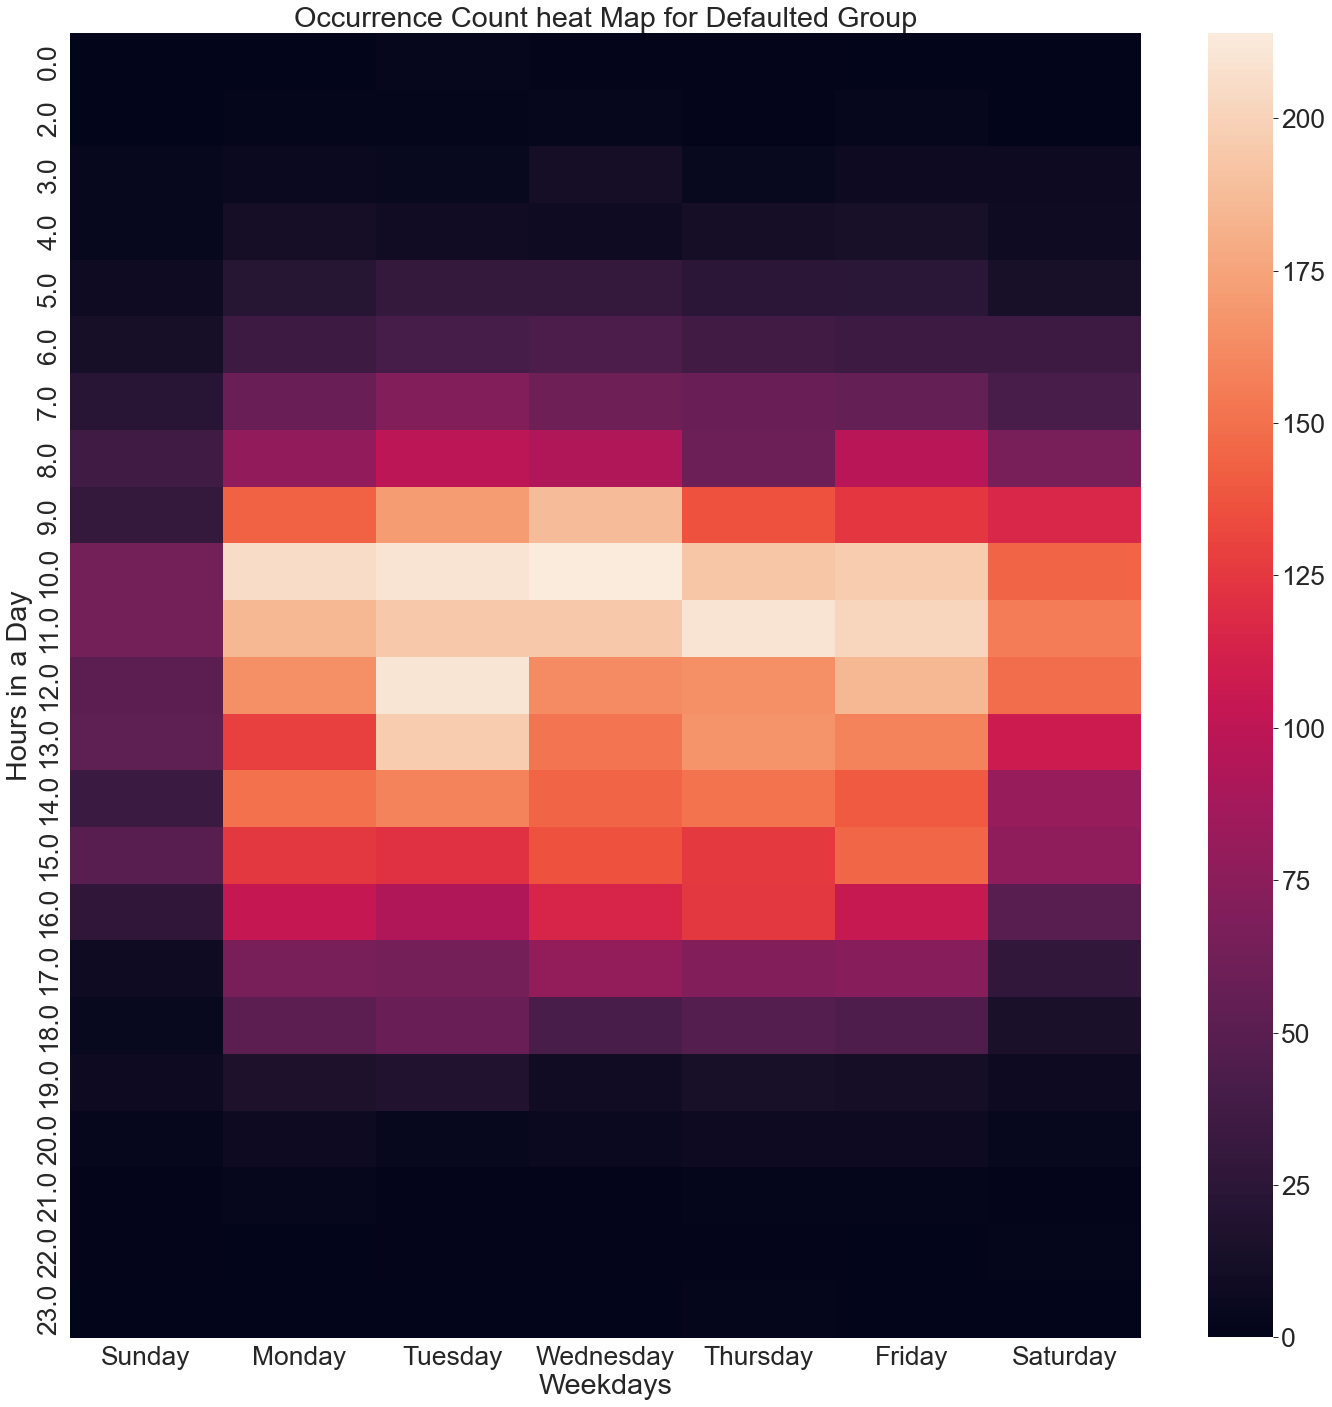

In [43]:
plt.figure(figsize=(24,24))
sns.set_context("paper",font_scale=3)
sns.heatmap(pivot_table_default)
plt.title('Occurrence Count heat Map for Defaulted Group')
plt.xlabel('Weekdays')
plt.ylabel('Hours in a Day')

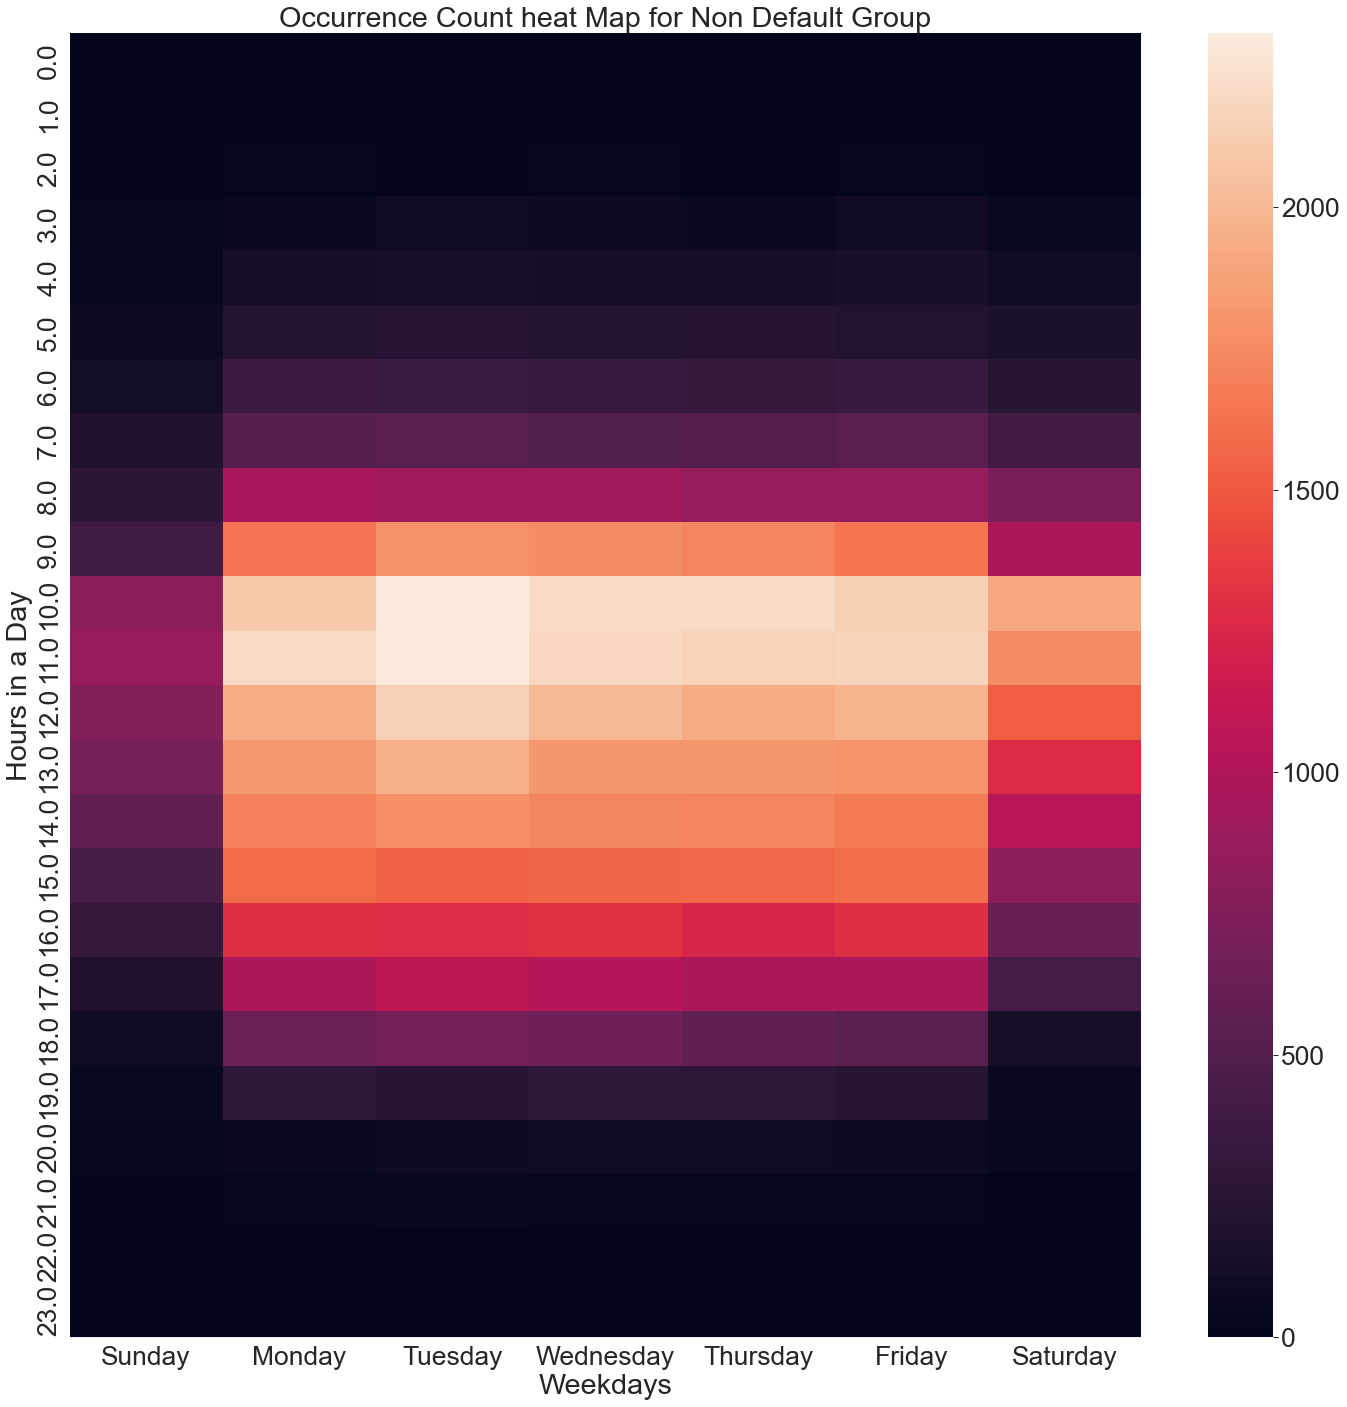

In [44]:
plt.figure(figsize=(24,24))
sns.set_context("paper",font_scale=3)
sns.heatmap(pivot_table_nondefault)
plt.title('Occurrence Count heat Map for Non Default Group')
plt.xlabel('Weekdays')
plt.ylabel('Hours in a Day')
sns.set()

From these two heat map:
1. It does show a good normal distribution that most people apply their loan around noon and on Tuesday and Wednesday, and the occurance drop down slowly when its not office hour.
2. But we can't see any differnet pattern between two groups, thus these two variables might be useless for the analysis.

# *Conclusion*

Based on the findings from above graphics, we can conclude the retention and removal of variables that we verified:

Kept Varibales:

1. Client_Income & Client_Income_Type: Although solely by the Client_Income we can not find significant pattern difference between the defaulted and non default customers, but with Client_Income_Type, we still can see the pattern difference, thus it's kept.

2. Credit_Amount and Loan_Annuity: These two variables are dependent and by calculating them we can get the Loan Duration information, which we can tell the pattern difference between defaulted and non default customers combining the age data.

3. Client_Education: With the pie chart, we find that the the percentage of defaulted customer in each ecucation level of Client_Education is different, so this variable may help us on building the prediction model.

4. Age_Date: By converting the Age_Date to Age, we then utilize the age data and find out that combining the age data and loan Duration there is pattern difference between defaulted and non default customers.

5. Score_Source_1 to 3: With the average credit score from these three score source, we find out that defaulted coustomers has lower score than non default customers, thus we consider this variable can help us on building the prediction model.

6. Employed_Days: The bar graph between Employed_Years vs Default shows a noticeable trend that indicates a negative correlation between the number of employed years and the probability of defaulting. Thus, we can infer that employed days can be considered an important factor in predicting a customer's chance of defaulting. 

6. Registragion_Days: The line graph between Registration_Years vs Default shows a noticeable trend that as Registration_Years increases, the likelihood of defaulting decrease. Thus, we can infer that registraion days can be considered an important feature. 


Removed Variables:

1. Application_Process_Day & Hour: we use these two variables plotting a heatmap of occurance on each weekday and hour, but the occurance of both defaulted and non default group are good normal distribution and can not find significant pattern difference, thus we consider these two variables do not have predictability and will remove from dataset for further model-building process.

2. Car_Owned: The pie charts indicate a minimal difference between default percentages for the two Car_Owned cases, with only a 1.3% gap. This suggests that owning a car may not play a significant role in determining a customer's likelihood of defaulting, hence we will remove this variable

# *Recommendation*

1. More detailed describtion in the Data Dictionary: With more detailed data describtion, we can have much preciser analysis on the outcome, for example, in the data describtion, it only states that Client_Income is the income of client, but in what period of time? Month or Year? Since the variance of data is huge, we need more detailed describtion to expand our story.

2. Annual Percentage Rate (APR): Since this is a car loan dataset, if the APR data for each customer can be collected, it might helps us to have more findings and more predictable variable.

3. Vehicle Type or Specs: When appying the car loan, financial institution would consider some information related to the car client is going to buy, thus if there are some data related to Vehicle Type or Specs, we might have some findings on this perspective.